# Introductory for credit risk analysis

<p style='text-align: justify;'> With the introduction of Basel II, banks are allowed to use their internally developed models for calculating regulatory capital. This is known as the Internal Ratings-Based (IRB) approach. Otherwise, the bank should calculate its regulatory capital based on the standardized approach which generally demands higher capital requirements. The purpose of the development of rating models is to identify and combine those factors that differentiate between facilities the best in terms of riskiness. Three main elements of loss equation terms used to describe the risk of facilities are the probability of default (PD), loss given default (LGD), and exposure at default (EAD). </p>


<p style='text-align: justify;'> By its definition, PD, is a quantitative measure of how likely an applicant for credit is to default within a certain period. Numerous models are available to pursue however, currently, the most commonly used one is the logistic regression (LR) approach. Very recently, survival analysis has been introduced into three main stages of credit risk modeling (PD, LGD, and EAD). This collection of statistical methods tries to model the time to default and has advantages compared to other credit risk analysis methods. The goal of the current project is to implement estimation of the PD which is to pursue the survival analysis as a theoretical framework.</p>


<p style='text-align: justify;'> All PD models share the same basic ideas. The first step is to classify a sample of previous customers based on historical repayment performance, into either good or bad. The next step is to link the characteristics (factors) of these clients to the default status of the client. Many different techniques are available for building such systems, for example, discriminant analysis, expert systems, and logistic regression. Currently, logistic regression is an industry-standard.</p>



<p style='text-align: justify;'> Lately, the concept of survival analysis has been introduced into credit risk modeling. Immediately raised question would be, what is the survival analysis? Survival analysis is the area of statistics that deals with the analysis of lifetime data. The variable of interest is the time to the occurrence of an event. It is worth mentioning that, it is commonly used in medical drug studies and reliability studies in engineering. As an example, in medical studies, the effect of a drug on the lifetime of a patient with a certain disease can be studied. The time to event in this case is defined as the time till death. </p>


<p style='text-align: justify;'> In the case of credit risk, the event of interest is default. The main advantage of survival analysis compared to other existing credit risk models frameworks is that the model is capable of including censored and truncated data in the development sample. While in the methods such as the logistic regression approach, this new observation which might play a more relevant role than older observations has to be removed from the dataset. Right censoring is the most common type of censoring and states that the event is not observed within the study period. In the case of credit risk: a customer who doesn’t default. Because most of the customers do not default, a lot of new observations are right-censored. </p>


<p style='text-align: justify;'> Another type of missing data is truncated data, of which left-truncation is the most common type. In this case, no information from the start of the loan until it is observed in the dataset is available. For example, if a loan is initiated before the study period, there is no observation of the start of this loan.</p>


<p style='text-align: justify;'> The survival analysis,  pursue a time-dependent dataset as feed. Hence, 
the use of survival analysis instead of logistic regression demands some new procedures. For example, if a facility is assessed yearly, the last observation has more information about the current creditworthiness of a facility and should be incorporated into the model. </p>

# Credit Scorecard Analysis process 

<p style='text-align: justify;'> Generally, a typical PD (more generally scorecard) modeling framework consists of five major steps and is presented below figure. With the development of the survival analysis framework, the focus is on the two phases: scorecard development and calibration. These are the stages that will differ from the current modeling process. I have to mention that in the following, I will focus on PD modeling rather than a scorecard. Hence, some of those steps such as score transformation will not be used but, for the sake of generality I just will mention them.</p>

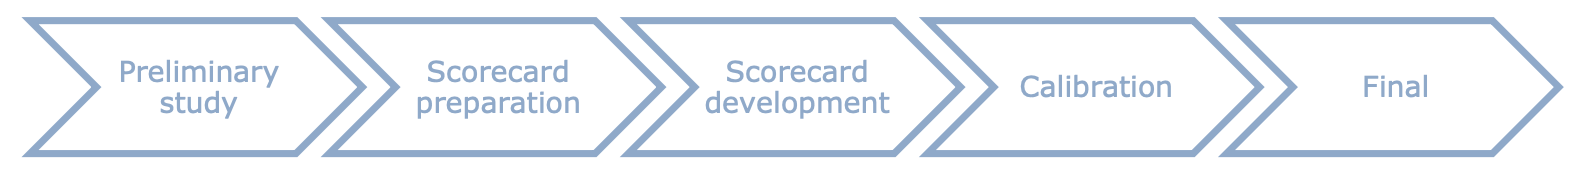

<p style='text-align: justify;'> As is shown in the above graph, any typical probability of default modeling consists of five steps. In the next paragraphs, I will try to briefly explain what they do. </p>

<p style='text-align: justify;'> The initial set-up or preliminary study provides an overview of the development of the model. It names all people in the development team, the objective of the model and regulatory requirements, and finally the methodology. </p>

<p style='text-align: justify;'> In the scorecard preparation phase it is all about factors. Factors are explanatory variables known as covariates. This stage identifies, collects, links, and cleans these factors to make them ready for regression. </p>


<p style='text-align: justify;'> The third stage, scorecard development, will be redeveloped and consists of single-factor analysis (SFA) and multifactor analysis (MFA). The SFA examines the standalone discriminatory power and predictive power of the individual factors. To reduce the number of factors in the multifactor analysis only the best predictive factors are selected. Next, the factors are transformed into interpretable scores, i.e., between 0-10. The SFA is followed by the MFA, this stage combines the best standalone predictive factors into a model. Correlation between factors is taken into account to create a stable and robust final model. The output of the MFA is not a credit rating but a creditworthiness score. The higher the score, the lower the expected PD of the facilities. </p>

## <p style='text-align: justify;'> Single factor analysis </p>

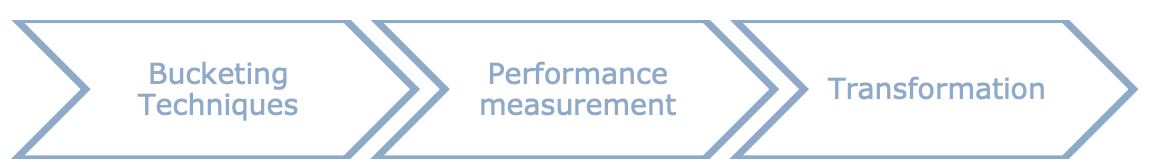


* <p style='text-align: justify;'> The first main stage in the model development, as well as implementation, is the single-factor analysis. In this stage, the factors that have predictive power for defaults are selected and transformed. For example, a defaulted counterparty before the default is likely to have factor scores that are significantly lower or higher than other comparable counterparties that did not default. The main task is to find the factors for which either high or low values correspond to high PDs. </p>



* <p style='text-align: justify;'> Next step is the performance measurement of each individual factor (used in the scorecard development. here we will not use this just mentioned for the sake of generality). This is the measure of the predictive power of an individual factor. This measure is used in the selection and transformation of factors. Four measures of predictive power are given: Power Statistic, Weight of Evidence (WoE), Information value, and trend analysis (Siddiqi, 2005). </p>

#### Bucketing
<p style='text-align: justify;'> In this project, we will only use of the bucketing technique in the single-factor analysis. In order to make credit-scoring systems robust, it is an industry standard to split continuous variables into bins. This process is also called bucketing. The goal of this process is threefold:</p>

* <p style='text-align: justify;'> The relation between the creditworthiness indicator and factor value can be assessed more easily by experts.
 </p>
* <p style='text-align: justify;'> Bucketing can be useful in transformation. </p>
* <p style='text-align: justify;'> Some performance tests require buckets. </p>


<p style='text-align: justify;'> In traditional approaches the split of the factors was based upon good-bad ratio (default rate) or similar measures. The definition of bad in these measures is defined as a default before the time horizon, while the other observations are considered good. Using survival analysis, not the default rate within a fixed time horizon is of interest, but the time to the actual event. Therefore, the survival function is used for different buckets.</p>


<p style='text-align: justify;'> The bucketing process consists of the following steps:</p>

* <p style='text-align: justify;'> 1. Rank factor scores.</p>

* <p style='text-align: justify;'> 2. Split data in equal buckets.</p>

* <p style='text-align: justify;'> (optional) For small buckets it might be necessary to check on trend and merge bucket that do not comply with trend.</p>

* <p style='text-align: justify;'> 4. Compute the KM estimator and confidence interval for every bucket.</p>

* <p style='text-align: justify;'> 5. Compare survival functions of the buckets using the Logrank test</p>

* <p style='text-align: justify;'> 6. Merge the buckets with the highest p-value and above significance level (typically 0.05).</p>

* <p style='text-align: justify;'> 7. Repeat Steps 4 and 6 until all buckets are significantly different.</p>

# Multi factor analysis
<p style='text-align: justify;'> After the singlefactor analysis, the multifactor analysis is started. The multifactor analysis determines how the individual risk drivers, identified in the SFA, is incorporated into the final model. The goal of the MFA is to come up with a final model based on the best combined explanatory factors, taking into account redundancy/dependence between the factors. Any typical multi-factor analysis used in the credit risk modelling composed of the folowwing main steps: </p>

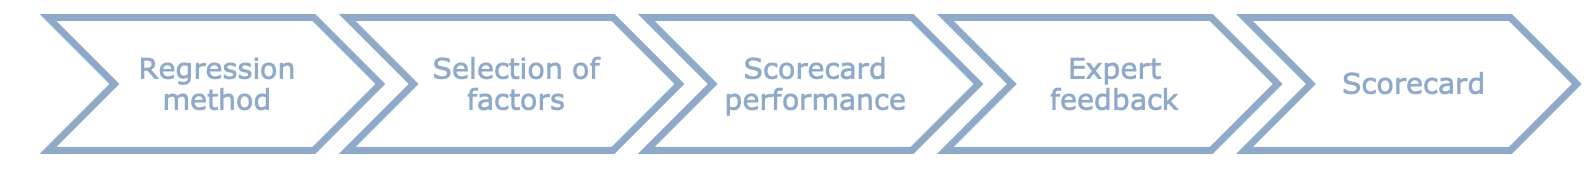

<p style='text-align: justify;'> The first step of the multi-factor analysis is to select a regression method. Here, I will use the cox-ph model for regression purposes.</p>

<p style='text-align: justify;'> The selection of factors consists of two steps: the stepwise multifactor analysis and sampling. The stepwise multifactor analysis finds the best set of predicting variables given a dataset. Next, is sampling used to generate subsets of the total dataset and come up with a robust model.</p>

<p style='text-align: justify;'> Once the features are selected and the model performs well on the test samples, it should be tested whether it also performs well on other subsamples.</p>

<p style='text-align: justify;'> Next step is feedback from experts. If experts strongly disagree with the statistical model, the weights can be changed accordingly to the experts. If the difference between the two models is not significant, the model with the new expert weights is selected, otherwise, the results should be discussed with the experts.</p>

<p style='text-align: justify;'> From a practical point of view, the main task of multifactor analysis is to select the best set of a given feature to be used in the final modeling. The multifactor analysis starts with explaining the different types of stepwise regression used to find the best set of factors from a dataset. Next, the selection of the final set of factors is explained and finally, the PD can be calculated by incorporating the selected factors in the model.  In the following, I will briefly give an overview of the methods which can be utilized in the best set of the features selection procedure.</p>

### <p style='text-align: justify;'> Stepwise regression </p>
<p style='text-align: justify;'> Stepwise regression is used to find the best set of predicting variables. Different regression technique can adopted for survival analysis. The most commonly used are backward elimination, forward selection, and selection-elimination regression. </p>

### <p style='text-align: justify;'> Backward elimination </p>
<p style='text-align: justify;'> Backward elimination starts with all factors and deleting them one at a time. First, the least predicting factor is removed based on the p-value. The p-value is calculated as the Wald test statistic and is used to test the true value of the parameter based on the sample estimate. The factor with the highest p-value that is above the significance level (typically 0.05) is removed and the model has fitted again until only significant factors remain. This process is called backward elimination. </p>

The process steps:
* <p style='text-align: justify;'> 1. First a Cox-PH model is fitted with all factors on the goal variable and create a list with all the p-values. </p>
* <p style='text-align: justify;'> 2. Next, compare the p-values. The highest p-value that is above the significance level is removed from the list with selected variables. The significance level is usually set at 0.05. </p>

* <p style='text-align: justify;'> 3. If one of the factors becomes counterintuitive the factor is removed. Intuitive means that if a
positive influence on the score is expected also a positive coefficient should come out of the regression. </p>

* <p style='text-align: justify;'> 4. Repeat Steps 1-3 with the remainder of the variables until all variables have a p-value lower than the significance level. The main disadvantage of this model is the efficiency of the model. This factor selection procedure demands a lot of time if many factors are present. </p>

### <p style='text-align: justify;'> Forward Selection </p>
<p style='text-align: justify;'> The forward selection starts with selecting the most significant factor for predicting the outcome. In each following step, one factor is added that has the lowest p-value and a p-value lower compared to the significance level. The procedure is given by: </p>

* <p style='text-align: justify;'> 1. First, a standalone regression of all the individual factors on the goal variable is performed, and create a list with all the p-values. </p>

* <p style='text-align: justify;'> 2. Next, compare the p-values and the lowest p-value that is below the significance level is added to the list with selected variables. The significance level is usually set at 0.05. </p>

* <p style='text-align: justify;'> 3. If one of the selected factors has a p-value below the threshold or becomes counter intuitive it is deleted. </p>

* <p style='text-align: justify;'> 4. Fit a Cox model with the selected variables and each individual remaining factors. </p>

* <p style='text-align: justify;'> 5. Repeat Step 2 - 4 until no further factors meet the requirements from Step 2. </p>

<p style='text-align: justify;'> This process has one a main advantage: the performance. This process is efficient compared to, for example, backward elimination which results in a faster factor selection process. A disadvantage of this process is that it often selects too many factors which are often correlated. </p>


### <p style='text-align: justify;'> Selection-Elimination Regression </p>
<p style='text-align: justify;'> The selection elimination regression is developed for the survival model as well. The selection elimination regression multifactor analysis selects step-by-step the most predictive factors: </p>

* <p style='text-align: justify;'> 1. First a standalone regression of all the individual factors on the goal variable is done. </p>

* <p style='text-align: justify;'> 2. A list is created for all the factors that have an intuitive coefficient and a p-value below the significance level set by the modeler. Usually, a significance level of 0.05 is chosen. </p>

* <p style='text-align: justify;'> 3. Select the factor with the lowest AIC value from the list created in Step 2. </p>

* <p style='text-align: justify;'> 4. Do a combined regression of the previous selected factors, combined with the other individual factors. </p>

* <p style='text-align: justify;'> 5. Repeat Step 2 until no further factors meet the requirements from Step 2. </p>

* <p style='text-align: justify;'> 6. If one of the previously selected factors has a p-value below the threshold or becomes counterintuitive it is deleted. </p>

* <p style='text-align: justify;'> 7. The AIC value of the previous regression round is compared with the new AIC values. If the AIC value of the previous round is better than the new round, the factors of the previous round are
chosen and the regression stops. </p>

* <p style='text-align: justify;'> 8. In case the new AIC is better, the factor with the lowest combined AIC value is selected from the list created in Step 2. </p>

* <p style='text-align: justify;'> 9. Repeat Step 4 to 8 until no further factors meet the requirements from Step 2. </p>

# Priliminary study

## Logistic regression
<p style='text-align: justify;'> Current PD estimations are based upon logistic regression. This methodology consists of taking a sample of previous customers and classify them into good or bad (good-bad modelling). The classification is based on the repayment performance over a given period. The goal of this regression modelling is to estimate credit risk and to extract variables that are important in credit risk prediction.</p>

<p style='text-align: justify;'> The observations in the portfolio are marked as good or bad based on certain criteria. These criteria are mainly based on payment behaviour. For example, a typical criterion for a bad observation is a payment delay of more than 90 days. A good observation is then an observation for which payments have been received on time. Finally, observations for which it cannot be determined whether they are good or bad, are marked as undefined and left out of the modelling.</p>


<p style='text-align: justify;'> The logistic regression is different from regular regression because dependent variable is binary. A measure of the probability of the outcome is given by the odds of occurrence an event. If the probability of defaulting of a facility is given by $P$, then the probability of a facility not defaulting is given by $1-P$. The odds of default are given by:</p>

$$odd of default = \frac{p}{1-p}$$

<p style='text-align: justify;'> The probability that a facility ends up in default is modelled by the logistic model and is given by:</p>

$$P(default|x_{i}) = \frac{exp(\sum_{i = 0} \beta_{i}x{i})}{1 + exp(\sum_{i = 0} \beta_{i}x{i})} = \frac{1}{1 + exp(-\sum_{i = 0} \beta_{i}x{i})}$$



<p style='text-align: justify;'> The shape of the logistic function from Equation 2 is given in Figure 6. The shape suggests that the probability for low predictor values x is low, and then there is some threshold value of the predictor at which the estimated probability of event begins to increase. For high predictor values the probability is high.</p>


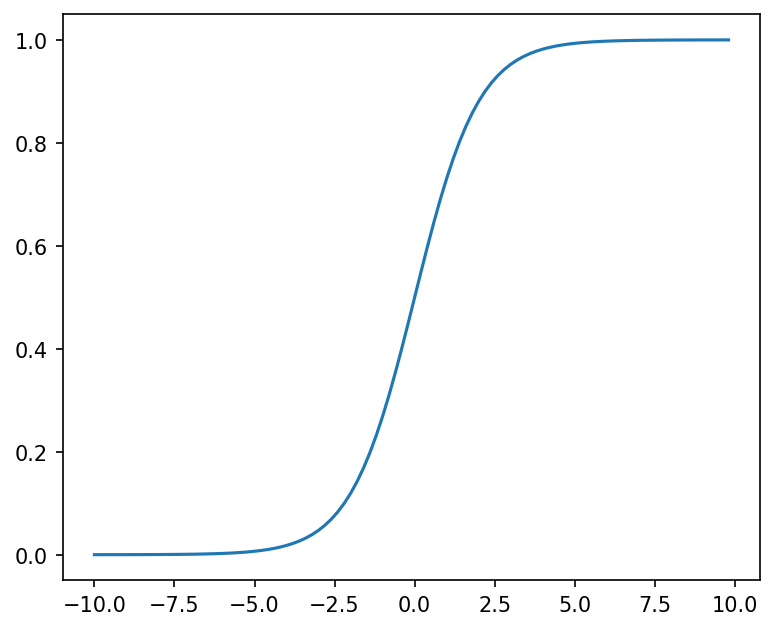

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

f, (ax_hist) = plt.subplots(1, figsize = (6, 5), dpi = 150)


x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)
#Finally, call polt()

plt.plot(x,sig)
plt.show()

<p style='text-align: justify;'> The popularity of the logistic model is mainly caused by this shape and the fact the function ranges between 0 and 1. The model is used to describe the probability of default of a facility, which is always between 0 and 1.</p>


<p style='text-align: justify;'> In order to estimate the PD for a fixed time period such as in the logistic regression, the data must be prepared for one year observations. This consists of taking an observation and observe if the facility ended up good or bad.</p>


<p style='text-align: justify;'> Some facilities leave the portfolio before the one year period expires, for example because the loan is sold. In below figure, Facility 1 and 2 are still in the portfolio after one year and can therefore be measured. Facility 3 is in default after 4 months and is therefore marked as bad. Facility 4 and 5 are still marked as good when they leave (for example loan is sold) the portfolio after 4 and 10 months. If the time between the first observation and the facility leaving the portfolio is between 1-6 months the facility is classified as undefined. If the facility leaves between 7-12 months, the facility is classified as good. Because of this Facility 4 is left out of the modelling and facility 5 is marked as good..</p>


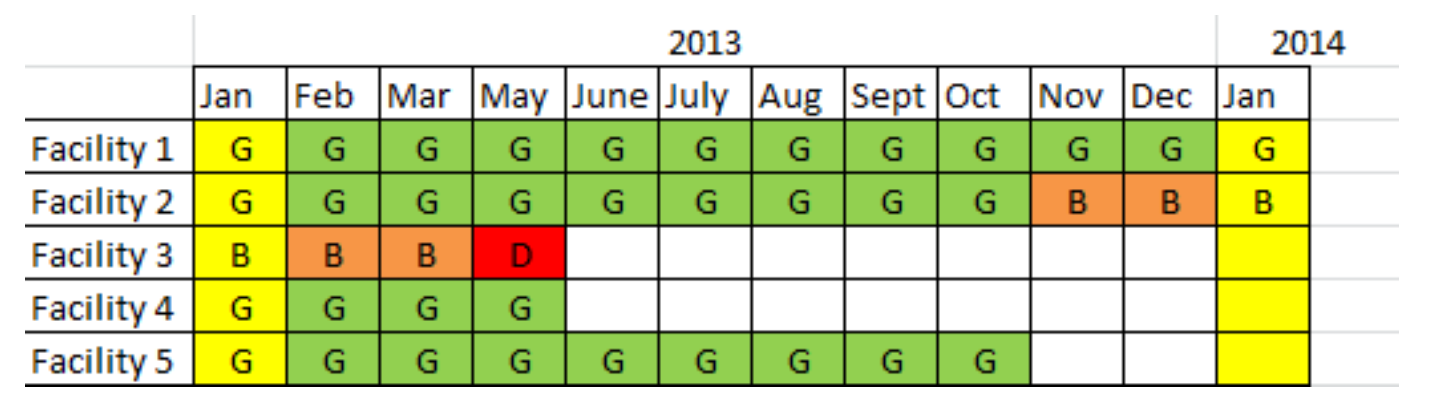

<p style='text-align: justify;'> This poses a problem with the logistic regression since the goal is to generate an unbiased model, as few facilities as possible should be removed from the dataset. Observations like facility 4 are removed from the dataset while they do contain information. They are not in the dataset for one year but with the values of Facility 4, the facility survived at least 4 months. Facility 5 is only in the portfolio for 10 months but in the regression this observation is assumed to be for the full year present.</p>

<p style='text-align: justify;'> Furthermore, logistic regression estimates the PD over a fixed time horizon (usually 1 year). For which the data must be prepared, a time consuming activity. A possible solution to these shortcomings might be the use of survival analysis. Survival analysis can incorporate incomplete observations as censored data. These are observations that for which the event is not observed during the study period, as will be further explained in Chapter 3. Survival analysis offers more advantages since it focuses on estimating the survival distribution, it can estimate the default risk over any future time horizon.</p>




# Scorecard preparation

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#pd.options.display.max_rows = None
pd.options.display.max_columns = None


# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


from optbinning import OptimalBinning   # pip install optbinning
from optbinning import MulticlassOptimalBinning

from IPython.core.display import display, HTML

import seaborn as sns; #sns.set(font_scale = 0.8)
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})

(CVXPY) Mar 18 08:11:13 AM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Version of ortools (9.2.9972) is too old. Expected >= 9.3.0.')
(CVXPY) Mar 18 08:11:13 AM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Version of ortools (9.2.9972) is too old. Expected >= 9.3.0.')


## Loading the dataset

In [4]:
# Loading the data set
data = pd.read_csv('dataMissing.csv' , delimiter = ',' )
data.drop('CustID',       axis = 1,      inplace = True)
display(pd.concat([data.head(),           data.tail()]))

,CustAge,TmAtAddress,ResStatus,EmpStatus,CustIncome,TmWBank,OtherCC,AMBalance,UtilRate,status
0,53.0,62,<undefined>,Unknown,50000,55,Yes,1055.93,0.22,0
1,61.0,22,Home Owner,Employed,52000,25,Yes,1161.58,0.24,0
2,47.0,30,Tenant,Employed,37000,61,No,877.23,0.29,0
3,NaN,75,Home Owner,Employed,53000,20,Yes,157.37,0.08,0
4,68.0,56,Home Owner,Employed,53000,14,Yes,561.84,0.11,0
1195,54.0,92,Home Owner,Unknown,41000,51,Yes,1230.98,0.35,0
1196,NaN,19,Tenant,Unknown,45000,4,Yes,239.28,0.13,1
1197,29.0,35,Home Owner,Employed,27000,47,Yes,16.18,0.01,1
1198,56.0,66,Tenant,Employed,38000,48,Yes,1009.24,0.47,0
1199,44.0,24,Tenant,Unknown,41000,16,Yes,1039.40,0.19,0


## Primary explotation of the dataset

In [5]:
# Extracting the dimension of the given dataset
print('The shape of a given dataset is ({m},{n})'.format(m = data.count()[0], n = len(data.columns)))

The shape of a given dataset is (1170,10)


In [6]:
# It will be useful if skeem through the type of a given features in dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CustAge      1170 non-null   float64
 1   TmAtAddress  1200 non-null   int64  
 2   ResStatus    1200 non-null   object 
 3   EmpStatus    1200 non-null   object 
 4   CustIncome   1200 non-null   int64  
 5   TmWBank      1200 non-null   int64  
 6   OtherCC      1200 non-null   object 
 7   AMBalance    1200 non-null   float64
 8   UtilRate     1200 non-null   float64
 9   status       1200 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 93.9+ KB


## Seperating the categorical and numerical features

In [7]:
# Seperating the categorical and numeric features
categorical = data.select_dtypes(include = ['object'])
categorical['status'] = data['status'].values
categorical

,ResStatus,EmpStatus,OtherCC,status
0,<undefined>,Unknown,Yes,0
1,Home Owner,Employed,Yes,0
2,Tenant,Employed,No,0
3,Home Owner,Employed,Yes,0
4,Home Owner,Employed,Yes,0
...,...,...,...,...
1195,Home Owner,Unknown,Yes,0
1196,Tenant,Unknown,Yes,1
1197,Home Owner,Employed,Yes,1
1198,Tenant,Employed,Yes,0


In [8]:
categorical['status'].unique()

array([0, 1])

In [9]:
for element in categorical.columns:
    print('\nThe list of unique elements of feature {elem} is: {list}'.format(elem = element, \
                                                                           list = data[element].unique()))


The list of unique elements of feature ResStatus is: ['<undefined>' 'Home Owner' 'Tenant' 'Other']

The list of unique elements of feature EmpStatus is: ['Unknown' 'Employed']

The list of unique elements of feature OtherCC is: ['Yes' 'No']

The list of unique elements of feature status is: [0 1]


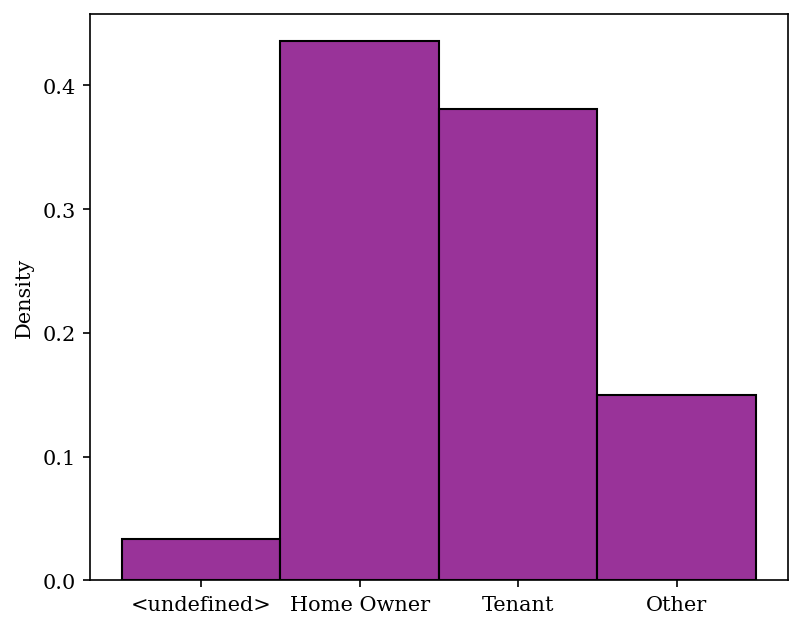

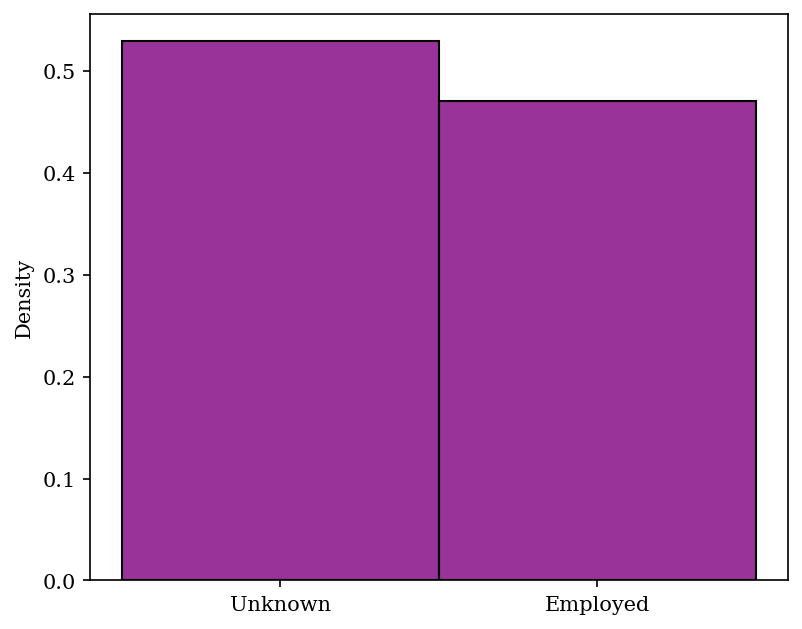

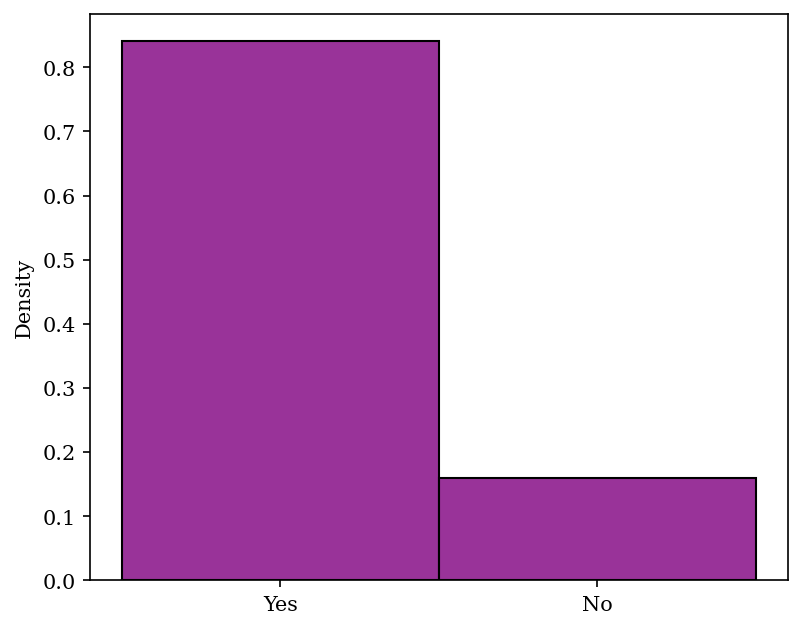

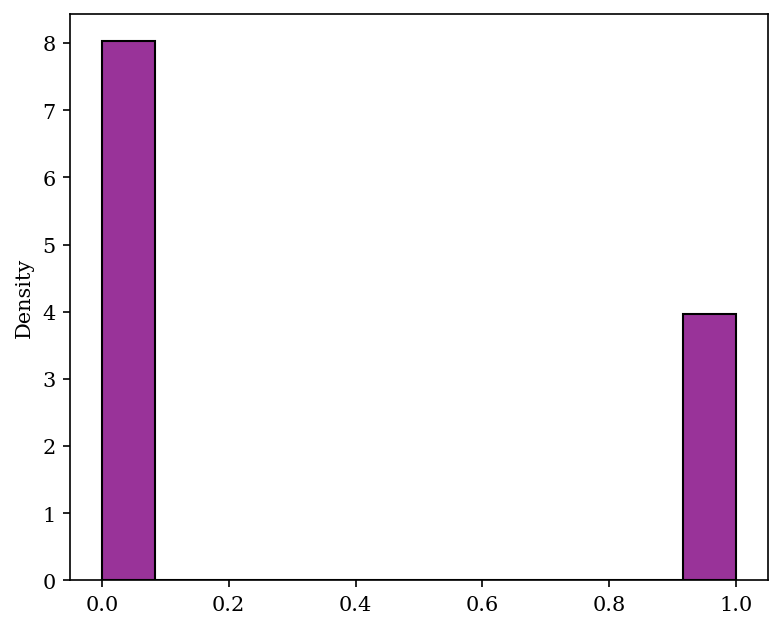

In [10]:
for elemt in categorical.columns:
    # The probability of default (PD) will be the first predictors which is subjected to the 
    # explatory analysis. In order to get a general and basic statistical information, in addition
    # to its histogram, drawing its box plot in the same panel would gives more information. To this
    # end, in the below, the histogram and box plot of  of PD ig shown.

    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_hist) = plt.subplots(1, figsize = (6, 5), dpi = 150)
 
    # assigning a graph to each ax
    sns.histplot(data = data, x = elemt, ax = ax_hist, color = 'purple', alpha = 0.8, stat="density")
 
    # Remove x axis name for the boxplot
    ax_hist.set(xlabel = '')
    plt.show()

In [11]:
# Check the missing or inappropriate type of data
for element in categorical.columns:
    print(""" \nThe counts of each unique value for {elem} is {count}:\n""".format(elem = element, \
                                                  count = categorical[element].value_counts()))

 
The counts of each unique value for ResStatus is Home Owner     523
Tenant         457
Other          180
<undefined>     40
Name: ResStatus, dtype: int64:

 
The counts of each unique value for EmpStatus is Unknown     635
Employed    565
Name: EmpStatus, dtype: int64:

 
The counts of each unique value for OtherCC is Yes    1009
No      191
Name: OtherCC, dtype: int64:

 
The counts of each unique value for status is 0    803
1    397
Name: status, dtype: int64:



In [12]:
categorical['ResStatus'] = categorical['ResStatus'].replace('<undefined>', 'undefined' , regex=True)
categorical

,ResStatus,EmpStatus,OtherCC,status
0,undefined,Unknown,Yes,0
1,Home Owner,Employed,Yes,0
2,Tenant,Employed,No,0
3,Home Owner,Employed,Yes,0
4,Home Owner,Employed,Yes,0
...,...,...,...,...
1195,Home Owner,Unknown,Yes,0
1196,Tenant,Unknown,Yes,1
1197,Home Owner,Employed,Yes,1
1198,Tenant,Employed,Yes,0


In [13]:
# Seperating the categorical and numeric features
numerical = data.select_dtypes(include = ['int64', 'float64'])
numerical

,CustAge,TmAtAddress,CustIncome,TmWBank,AMBalance,UtilRate,status
0,53.0,62,50000,55,1055.93,0.22,0
1,61.0,22,52000,25,1161.58,0.24,0
2,47.0,30,37000,61,877.23,0.29,0
3,NaN,75,53000,20,157.37,0.08,0
4,68.0,56,53000,14,561.84,0.11,0
...,...,...,...,...,...,...,...
1195,54.0,92,41000,51,1230.98,0.35,0
1196,NaN,19,45000,4,239.28,0.13,1
1197,29.0,35,27000,47,16.18,0.01,1
1198,56.0,66,38000,48,1009.24,0.47,0


In [14]:
numerical["CustAge"].fillna(numerical["CustAge"].mean(), inplace = True)

In [15]:
numerical.describe()

,CustAge,TmAtAddress,CustIncome,TmWBank,AMBalance,UtilRate,status
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,45.109402,41.930833,39317.500000,34.243333,803.111483,0.220642,0.330833
std,9.684170,29.902807,8268.938255,25.189506,587.587261,0.258206,0.470709
min,21.000000,2.000000,18000.000000,2.000000,0.210000,0.000000,0.000000
25%,38.000000,19.000000,34000.000000,14.000000,337.492500,0.050000,0.000000
50%,45.000000,36.000000,39000.000000,28.000000,711.685000,0.130000,0.000000
75%,52.000000,58.000000,45000.000000,49.000000,1137.312500,0.310000,1.000000
max,74.000000,207.000000,62000.000000,128.000000,3812.000000,1.970000,1.000000


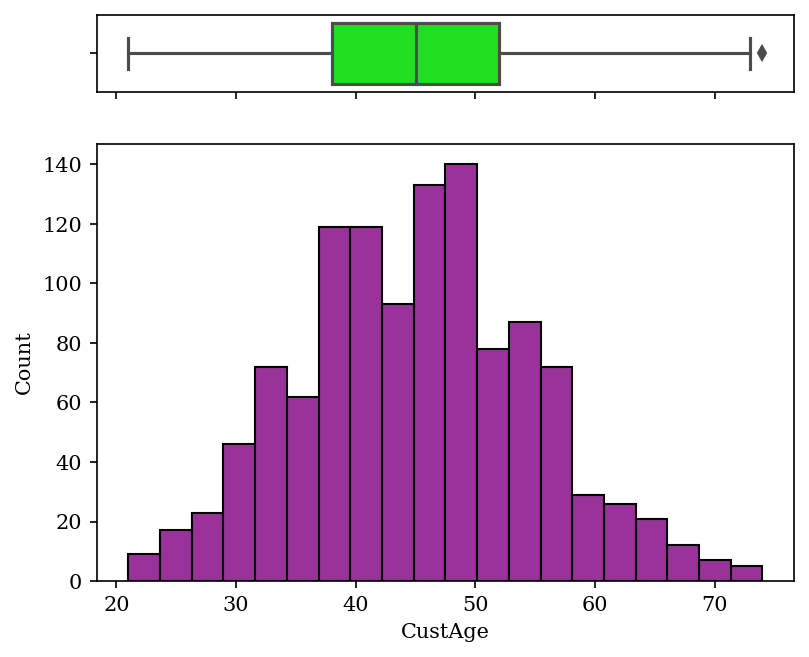

count    1170.000000
mean       45.109402
std         9.807645
min        21.000000
25%        38.000000
50%        45.000000
75%        52.000000
max        74.000000
Name: CustAge, dtype: float64






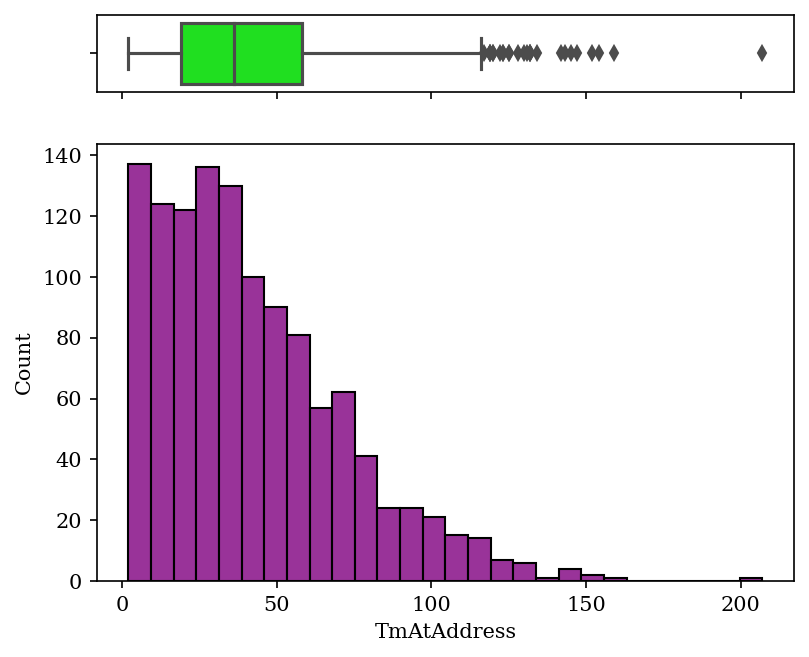

count    1200.000000
mean       41.930833
std        29.902807
min         2.000000
25%        19.000000
50%        36.000000
75%        58.000000
max       207.000000
Name: TmAtAddress, dtype: float64






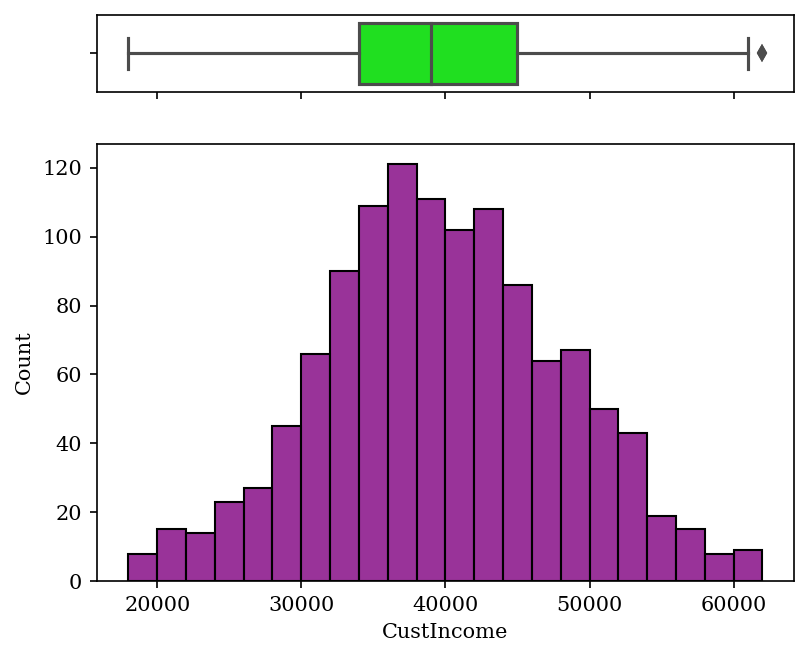

count     1200.000000
mean     39317.500000
std       8268.938255
min      18000.000000
25%      34000.000000
50%      39000.000000
75%      45000.000000
max      62000.000000
Name: CustIncome, dtype: float64






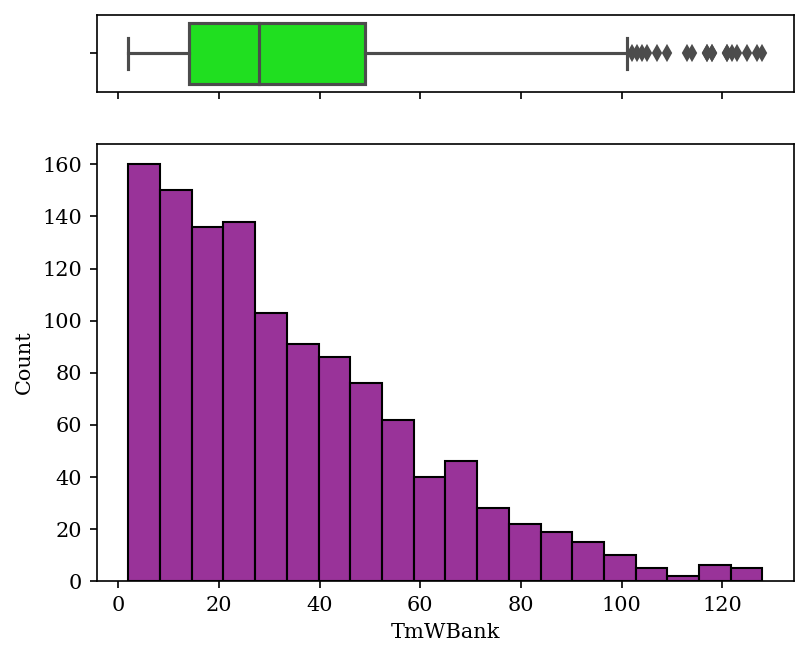

count    1200.000000
mean       34.243333
std        25.189506
min         2.000000
25%        14.000000
50%        28.000000
75%        49.000000
max       128.000000
Name: TmWBank, dtype: float64






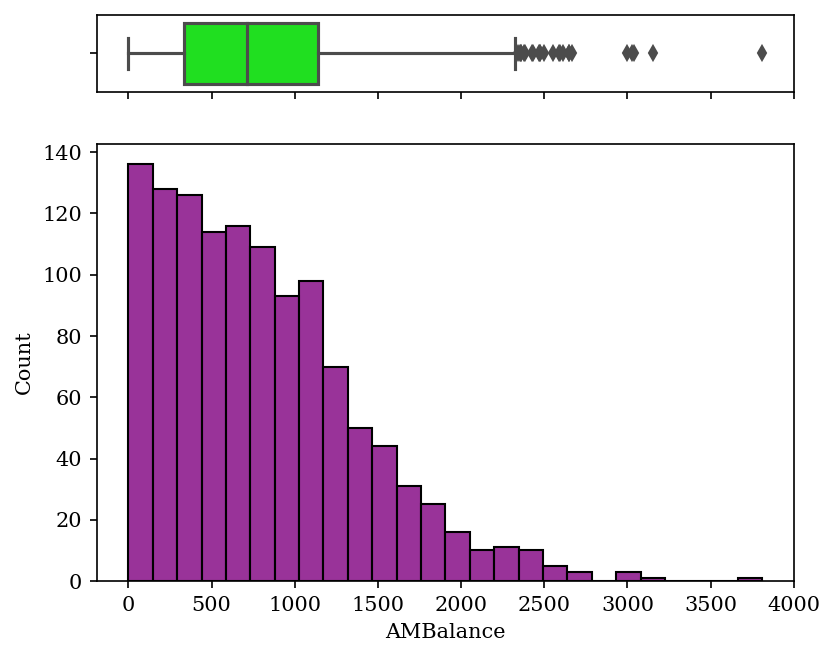

count    1200.000000
mean      803.111483
std       587.587261
min         0.210000
25%       337.492500
50%       711.685000
75%      1137.312500
max      3812.000000
Name: AMBalance, dtype: float64






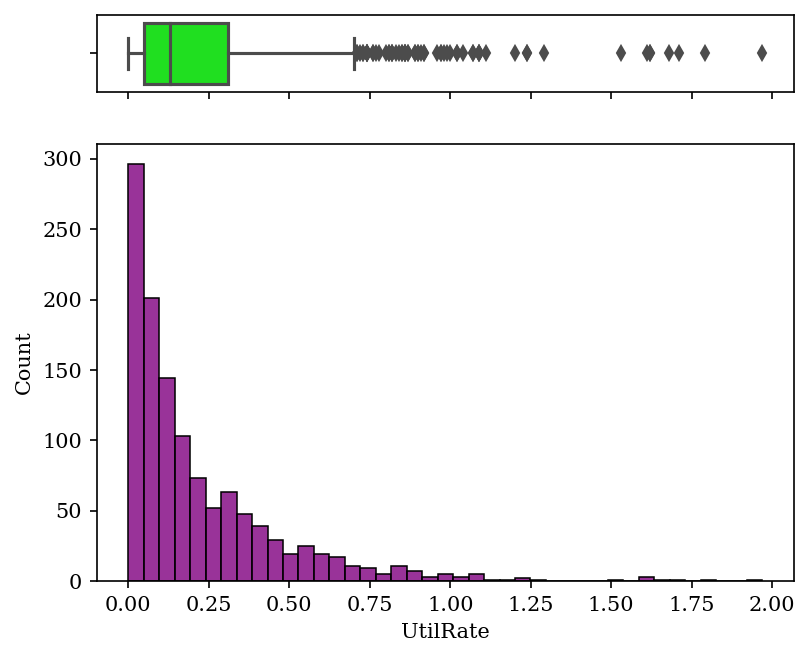

count    1200.000000
mean        0.220642
std         0.258206
min         0.000000
25%         0.050000
50%         0.130000
75%         0.310000
max         1.970000
Name: UtilRate, dtype: float64






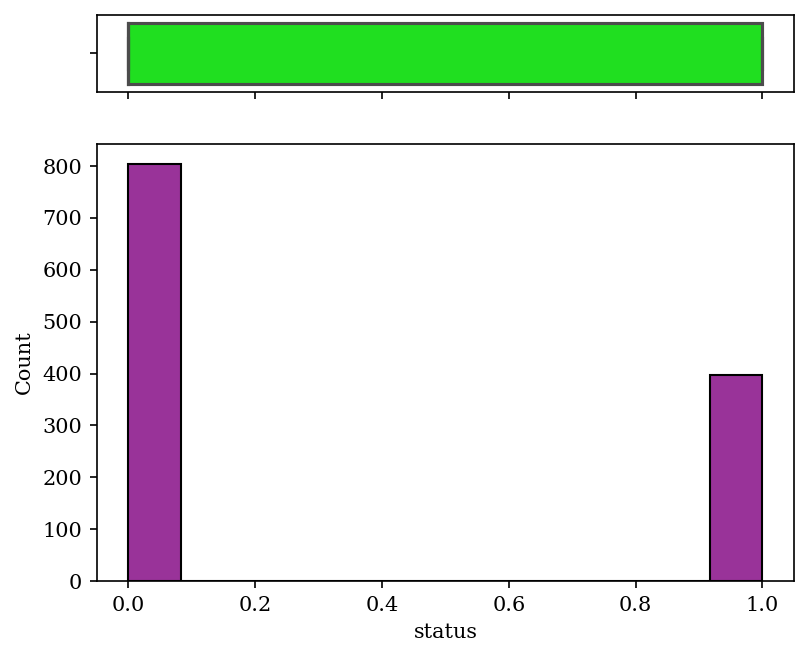

count    1200.000000
mean        0.330833
std         0.470709
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: status, dtype: float64




In [16]:
for elemt in numerical.columns:
    # The probability of default (PD) will be the first predictors which is subjected to the 
    # explatory analysis. In order to get a general and basic statistical information, in addition
    # to its histogram, drawing its box plot in the same panel would gives more information. To this
    # end, in the below, the histogram and box plot of  of PD ig shown.
    print('\n')
    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, \
                       gridspec_kw={"height_ratios": (.15, .85)}, figsize = (6, 5), dpi = 150)
 
    # assigning a graph to each ax
    sns.boxplot(data[elemt], ax = ax_box , color = 'lime', )
    sns.histplot(data = data, x = elemt, ax = ax_hist, color = 'purple', alpha = 0.8)
 
    # Remove x axis name for the boxplot
    ax_box.set(xlabel = '')
    plt.show()
    print(data[elemt].describe())
    print('\n')

# Scorecard development

## Single factor analysis

### Categorical features treatement 

In [17]:
# function to calculate woe of categorical features

def woe_categorical(df, cat_feature, good_bad_df, label_angel):
    fig , ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = ((15,10)))
    ax2 = ax1.twinx()
    #print([100]*len(df[cat_feature].unique().tolist()))
    #print(df[cat_feature].unique().tolist())
    sns.barplot(ax = ax1, x = df[cat_feature].unique().tolist(), y = [100]*len(df[cat_feature].unique().tolist()),\
                               color = 'blue', alpha = 0.3)
    sns.barplot(ax = ax1, x =  df[cat_feature].unique().tolist(),\
                y = (1- df.groupby(cat_feature)["status"].sum()/df.groupby(cat_feature)["status"].count())*100,\
                color = 'red', alpha = 0.3)
     
    df = pd.concat([df[cat_feature], good_bad_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    
    sns.lineplot(ax = ax2, x = np.array(df.iloc[:, 0].apply(str)), y = df['WoE'], markers = 'o', \
                linewidth = 3, markersize = 14 )
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=45)
    return df

In [18]:
# As shown above, we have to repeat the rebucketing untill all of those bins have distinct
# weight of evidence (or survival function equivalently). Once rebucketing is done, we have to 
# convert the feature's values into categories based on the optimal bin boundaries. The "kategorizer"
# does this job such that it assighns a unique string label into each values they are belonging the same
# bins.
def kategorizer(df, feature, bins):
    saffix = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
    names  = saffix[:len(bins)-1]
    df[feature] = pd.cut(df[feature], bins, labels = names)
    return df

In [19]:
def lin_skaler_numerical(data, c, d, leibel):
    a =  np.min(data.iloc[:,1])
    b =  np.max(data.iloc[:,1])
    data['Scaled_WoE'] = data.apply(lambda x: 0, axis=1)
    m, n = data.shape
    for i in range(m):
        #print(n-1)
        data.iloc[i,n-1] = c + ((d-c)/(b-a))*(data.iloc[i,1] - a)
    #print(data)    
    #data['Var_name'] = data.apply(lambda _: '', axis = 1)
    m, n = data.shape
    #print(data)
    
    data['Var_name'] = data['Var_name'].apply(lambda x: leibel +'_'+x)
    #print(data)
    #for i in range(m):
    #    print(data)
    #    print(data.iloc[i,0])
    #    data.iloc[i,n] = leibel + '_' + data.iloc[i,0]    
    return data[['Var_name', 'WoE', 'Scaled_WoE']]

In [20]:
def lin_skaler(data, c, d):
    a =  np.min(data.iloc[:,1])
    b =  np.max(data.iloc[:,1])
    data['Scaled_WoE'] = dummy.apply(lambda x: 0, axis=1)
    m, n = data.shape
    for i in range(m):
        print(n-1)
        dummy.iloc[i,n-1] = c + ((d-c)/(b-a))*(data.iloc[i,1] - a)
        
    data['Var_name'] = data.apply(lambda _: '', axis = 1)
    base_label =  data.columns[0]
    m, n = data.shape
    for i in range(m):
        #print(n-1)
        dummy.iloc[i,n-1] = base_label + '_' + data.iloc[i,0]
        
    return dummy[['Var_name', 'WoE', 'Scaled_WoE']]

In [21]:
# As shown above, we have to repeat the rebucketing untill all of those bins have distinct
# weight of evidence (or survival function equivalently). Once rebucketing is done, we have to 
# convert the feature's values into categories based on the optimal bin boundaries. The "kategorizer"
# does this job such that it assighns a unique string label into each values they are belonging the same
# bins.
def kategorizer_label(data):
    
    data = data.iloc[0:-3]
    m , n          = data.shape
    #print(m,n)
    saffix         = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
    #print(saffix)
    data['Var_name'] = data.apply(lambda _: '', axis = 1)
    
    m , n          = data.shape
    #print(m,n)
        
    for i in range(m):
        #print(n)
        data.iloc[i,n - 1] = saffix[i]
    return data

In [22]:
def lin_skaler(data, c, d):
    a =  np.min(data.iloc[:,1])
    b =  np.max(data.iloc[:,1])
    data['Scaled_WoE'] = dummy.apply(lambda x: 0, axis=1)
    m, n = data.shape
    for i in range(m):
        print(n-1)
        dummy.iloc[i,n-1] = c + ((d-c)/(b-a))*(data.iloc[i,1] - a)
        
    data['Var_name'] = data.apply(lambda _: '', axis = 1)
    base_label =  data.columns[0]
    m, n = data.shape
    for i in range(m):
        #print(n-1)
        dummy.iloc[i,n-1] = base_label + '_' + data.iloc[i,0]
        
    return dummy[['Var_name', 'WoE', 'Scaled_WoE']]

,ResStatus,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,Other,180,0.288889,0.150000,52.0,128.0,0.130982,0.159402,-0.196368,NaN,NaN
1,undefined,40,0.325000,0.033333,13.0,27.0,0.032746,0.033624,-0.026469,0.036111,0.169899
2,Home Owner,523,0.326960,0.435833,171.0,352.0,0.430730,0.438356,-0.017549,0.001960,0.008920
3,Tenant,457,0.352298,0.380833,161.0,296.0,0.405542,0.368618,0.095463,0.025338,0.113013


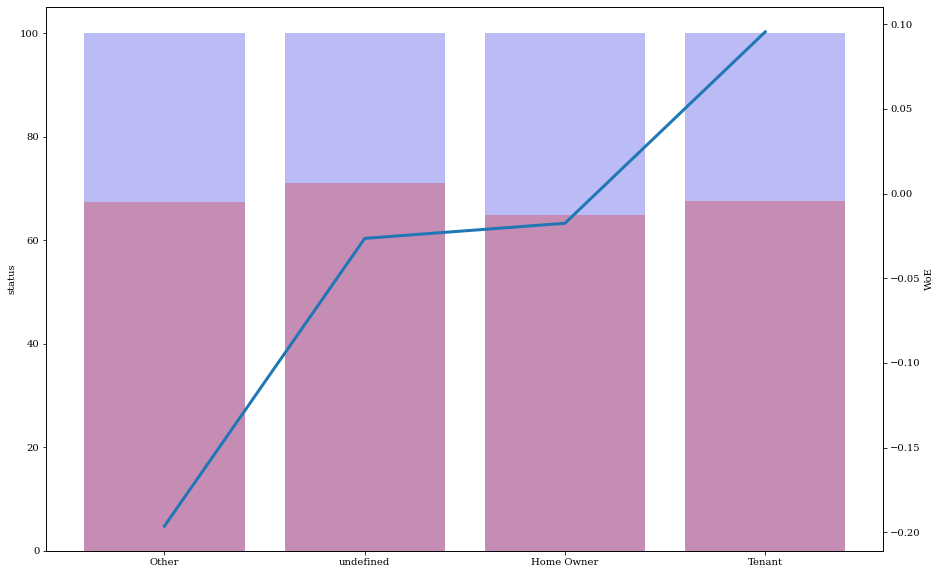

In [23]:
df_ResStatus = woe_categorical(categorical, 'ResStatus', categorical['status'] , label_angel = 90)
df_ResStatus

In [24]:
dummy = df_ResStatus[['ResStatus', 'WoE']].sort_values(axis = 0, by = 'WoE' )
#dummy

Scaled_WoE = lin_skaler(dummy, 0, 10)
Scaled_WoE

2
2
2
2


,Var_name,WoE,Scaled_WoE
0,ResStatus_Other,-0.196368,0.000000
1,ResStatus_undefined,-0.026469,5.821821
2,ResStatus_Home Owner,-0.017549,6.127473
3,ResStatus_Tenant,0.095463,10.000000


,EmpStatus,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,Employed,565,0.279646,0.470833,158.0,407.0,0.397985,0.506849,-0.241800,NaN,NaN
1,Unknown,635,0.376378,0.529167,239.0,396.0,0.602015,0.493151,0.199468,0.096732,0.441267


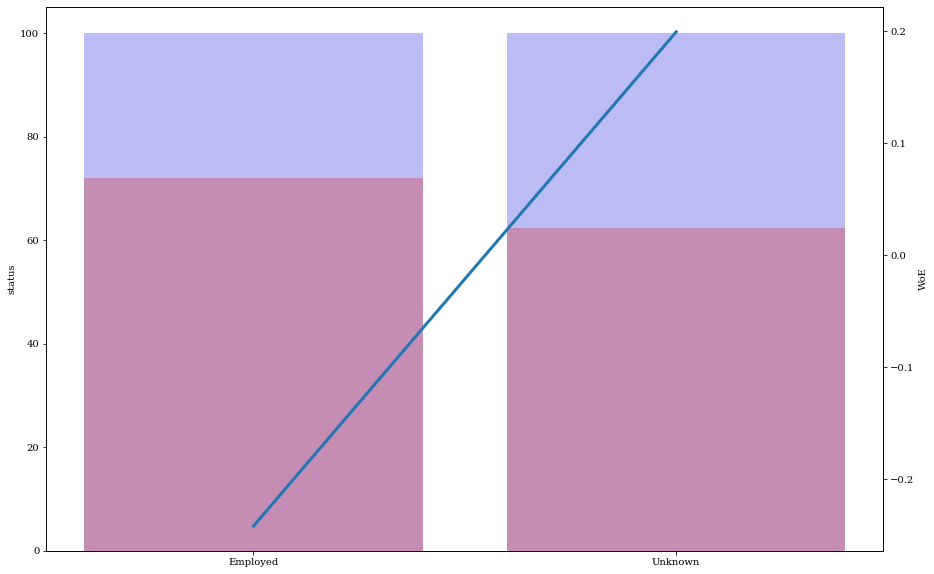

In [25]:
df_EmpStatus = woe_categorical(categorical, 'EmpStatus', categorical['status'] , label_angel = 90)
df_EmpStatus

In [26]:
dummy = df_EmpStatus[['EmpStatus', 'WoE']].sort_values(axis = 0, by = 'WoE' )

Scaled_WoE = pd.concat([Scaled_WoE, lin_skaler(dummy, 0, 10)], axis = 0)
Scaled_WoE

2
2


,Var_name,WoE,Scaled_WoE
0,ResStatus_Other,-0.196368,0.000000
1,ResStatus_undefined,-0.026469,5.821821
2,ResStatus_Home Owner,-0.017549,6.127473
3,ResStatus_Tenant,0.095463,10.000000
0,EmpStatus_Employed,-0.241800,0.000000
1,EmpStatus_Unknown,0.199468,10.000000


,OtherCC,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,Yes,1009,0.319128,0.840833,322.0,687.0,0.811083,0.855542,-0.053364,NaN,NaN
1,No,191,0.392670,0.159167,75.0,116.0,0.188917,0.144458,0.268316,0.073542,0.321681


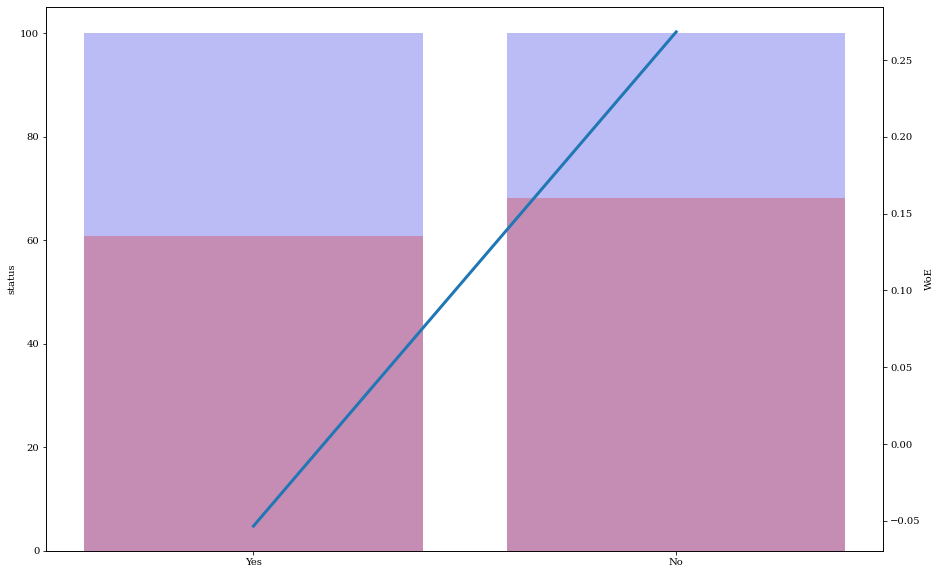

In [27]:
df_OtherCC = woe_categorical(categorical, 'OtherCC', categorical['status'] , label_angel = 90)
df_OtherCC

In [28]:
dummy = df_OtherCC[['OtherCC', 'WoE']].sort_values(axis = 0, by = 'WoE' )

Scaled_WoE = pd.concat([Scaled_WoE, lin_skaler(dummy, 0, 10)], axis = 0)
Scaled_WoE

2
2


,Var_name,WoE,Scaled_WoE
0,ResStatus_Other,-0.196368,0.000000
1,ResStatus_undefined,-0.026469,5.821821
2,ResStatus_Home Owner,-0.017549,6.127473
3,ResStatus_Tenant,0.095463,10.000000
0,EmpStatus_Employed,-0.241800,0.000000
1,EmpStatus_Unknown,0.199468,10.000000
0,OtherCC_Yes,-0.053364,0.000000
1,OtherCC_No,0.268316,10.000000


### Numerical ferature treating 

In [29]:
# First bucketing "orig_time" feature 
optb = OptimalBinning(name = 'CustAge', dtype = "numerical", solver = "cp",)
optb.fit(numerical['TmAtAddress'], numerical['status'])

OptimalBinning(name='CustAge')

In [30]:
# Calculated optimal bins and corresponding weigh of evidence and information values
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 6.50)",82,0.068333,51,31,0.378049,-0.20658,0.003011,3.756645e-04
1,"[6.50, 22.50)",286,0.238333,188,98,0.342657,-0.052944,0.000674,8.423287e-05
2,"[22.50, 27.50)",87,0.072500,64,23,0.264368,0.31897,0.006943,8.642027e-04
3,"[27.50, 31.50)",64,0.053333,54,10,0.156250,0.981981,0.041301,4.964713e-03
4,"[31.50, 63.50)",431,0.359167,288,143,0.331787,-0.004303,0.000007,8.317252e-07
5,"[63.50, inf)",250,0.208333,158,92,0.368000,-0.163612,0.005722,7.145126e-04
6,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
7,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,1200,1.000000,803,397,0.330833,,0.057658,7.004157e-03


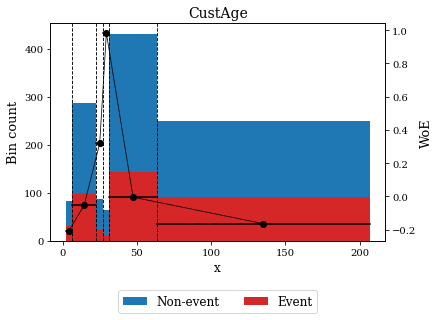

array([-inf,  6.5, 22.5, 27.5, 31.5, 63.5,  inf])

In [31]:
# Combined plot of bincount and weight of evidence corresponding to each bin with actual boundaries
optb.binning_table.plot(metric = "woe", style = "actual", add_special = False, add_missing = False)
bins = np.append(-np.inf, np.append(optb.splits, +np.inf))
bins

In [32]:
x     = optb.binning_table.build()
x     = kategorizer_label(x)
dummy = x[['Var_name', 'WoE']].sort_values(axis = 0, by = 'WoE' )

Scaled_WoE = pd.concat([Scaled_WoE, lin_skaler_numerical(dummy, 0, 10, 'TmAtAddress')], axis = 0)
Scaled_WoE.sort_values(by = 'Var_name', ).reset_index( drop = True)

,Var_name,WoE,Scaled_WoE
0,EmpStatus_Employed,-0.2418,0.000000
1,EmpStatus_Unknown,0.199468,10.000000
2,OtherCC_No,0.268316,10.000000
3,OtherCC_Yes,-0.053364,0.000000
4,ResStatus_Home Owner,-0.017549,6.127473
5,ResStatus_Other,-0.196368,0.000000
6,ResStatus_Tenant,0.095463,10.000000
7,ResStatus_undefined,-0.026469,5.821821
8,TmAtAddress_A,-0.20658,0.000000
9,TmAtAddress_B,-0.052944,1.292623


In [33]:
Data  = kategorizer(numerical, 'CustAge', bins)
Data

,CustAge,TmAtAddress,CustIncome,TmWBank,AMBalance,UtilRate,status
0,E,62,50000,55,1055.93,0.22,0
1,E,22,52000,25,1161.58,0.24,0
2,E,30,37000,61,877.23,0.29,0
3,E,75,53000,20,157.37,0.08,0
4,F,56,53000,14,561.84,0.11,0
...,...,...,...,...,...,...,...
1195,E,92,41000,51,1230.98,0.35,0
1196,E,19,45000,4,239.28,0.13,1
1197,D,35,27000,47,16.18,0.01,1
1198,E,66,38000,48,1009.24,0.47,0


In [34]:
# First bucketing "orig_time" feature 
optb = OptimalBinning(name = 'TmAtAddress', dtype = "numerical", solver = "cp",)
optb.fit(numerical['TmAtAddress'], numerical['status'])

OptimalBinning(name='TmAtAddress')

In [35]:
# Calculated optimal bins and corresponding weigh of evidence and information values
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 6.50)",82,0.068333,51,31,0.378049,-0.20658,0.003011,3.756645e-04
1,"[6.50, 22.50)",286,0.238333,188,98,0.342657,-0.052944,0.000674,8.423287e-05
2,"[22.50, 27.50)",87,0.072500,64,23,0.264368,0.31897,0.006943,8.642027e-04
3,"[27.50, 31.50)",64,0.053333,54,10,0.156250,0.981981,0.041301,4.964713e-03
4,"[31.50, 63.50)",431,0.359167,288,143,0.331787,-0.004303,0.000007,8.317252e-07
5,"[63.50, inf)",250,0.208333,158,92,0.368000,-0.163612,0.005722,7.145126e-04
6,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
7,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,1200,1.000000,803,397,0.330833,,0.057658,7.004157e-03


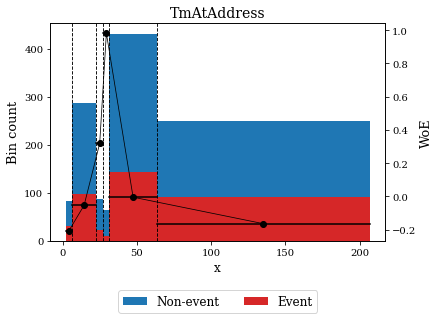

array([-inf,  6.5, 22.5, 27.5, 31.5, 63.5,  inf])

In [36]:
# Combined plot of bincount and weight of evidence corresponding to each bin with actual boundaries
optb.binning_table.plot(metric = "woe", style = "actual", add_special = False, add_missing = False)
bins = np.append(-np.inf, np.append(optb.splits, +np.inf))
bins

In [37]:
# As is shown in above cell, the calculated weight of evidence for those bins 
# betweeen [21.5, 27.5] are close to eachother so it makes a lot of scence to
# combine them. The new bin boundaries are listed in below.
user_splits =       [31.5,  63.5,]
user_splits_fixed = [False, False]

In [38]:
# Rebucketing with new bin boundaries to see if we will see a uniform trend or not
optb = OptimalBinning(name = 'TmAtAddress', dtype = "numerical", solver = "cp",
                      user_splits = user_splits, user_splits_fixed = user_splits_fixed)
optb.fit(numerical['TmAtAddress'], numerical['status'])

OptimalBinning(name='TmAtAddress', user_splits=[31.5, 63.5],
               user_splits_fixed=array([False, False]))

In [39]:
# Calculated optimal bins and corresponding weight of evidence after merging some bins
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 31.50)",519,0.432500,357,162,0.312139,0.085721,0.003131,3.912220e-04
1,"[31.50, 63.50)",431,0.359167,288,143,0.331787,-0.004303,0.000007,8.317252e-07
2,"[63.50, inf)",250,0.208333,158,92,0.368000,-0.163612,0.005722,7.145126e-04
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,1200,1.000000,803,397,0.330833,,0.008860,1.106566e-03


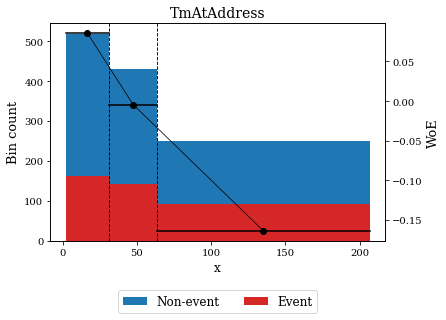

array([-inf, 31.5, 63.5,  inf])

In [40]:
# The calculated weight of evidence with the new bin boundaries show perfect uniformly increasing trend.
optb.binning_table.plot(metric = "woe", style = "actual", add_special = False, add_missing = False)
bins = np.append(-np.inf, np.append(optb.splits, +np.inf))
bins

In [41]:
x     = optb.binning_table.build()



x     = kategorizer_label(x)
dummy = x[['Var_name', 'WoE']].sort_values(axis = 0, by = 'WoE' )

Scaled_WoE = pd.concat([Scaled_WoE, lin_skaler_numerical(dummy, 0, 10, 'TmAtAddress')], axis = 0)
Scaled_WoE.sort_values(by = 'Var_name', ).reset_index( drop = True)

,Var_name,WoE,Scaled_WoE
0,EmpStatus_Employed,-0.2418,0.000000
1,EmpStatus_Unknown,0.199468,10.000000
2,OtherCC_No,0.268316,10.000000
3,OtherCC_Yes,-0.053364,0.000000
4,ResStatus_Home Owner,-0.017549,6.127473
5,ResStatus_Other,-0.196368,0.000000
6,ResStatus_Tenant,0.095463,10.000000
7,ResStatus_undefined,-0.026469,5.821821
8,TmAtAddress_A,-0.20658,0.000000
9,TmAtAddress_A,0.085721,10.000000


In [42]:
Data  = kategorizer(numerical, 'TmAtAddress', bins)
Data

,CustAge,TmAtAddress,CustIncome,TmWBank,AMBalance,UtilRate,status
0,E,B,50000,55,1055.93,0.22,0
1,E,A,52000,25,1161.58,0.24,0
2,E,A,37000,61,877.23,0.29,0
3,E,C,53000,20,157.37,0.08,0
4,F,B,53000,14,561.84,0.11,0
...,...,...,...,...,...,...,...
1195,E,C,41000,51,1230.98,0.35,0
1196,E,A,45000,4,239.28,0.13,1
1197,D,B,27000,47,16.18,0.01,1
1198,E,C,38000,48,1009.24,0.47,0


In [43]:
# First bucketing "orig_time" feature 
optb = OptimalBinning(name = 'CustIncome', dtype = "numerical", solver = "cp",)
optb.fit(numerical['CustIncome'], numerical['status'])

OptimalBinning(name='CustIncome')

In [44]:
# Calculated optimal bins and corresponding weigh of evidence and information values
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 26500.00)",75,0.062500,34,41,0.546667,-0.89163,0.054330,0.006575
1,"[26500.00, 30500.00)",91,0.075833,48,43,0.472527,-0.594418,0.028851,0.003554
2,"[30500.00, 35500.00)",231,0.192500,152,79,0.341991,-0.049986,0.000485,0.000061
3,"[35500.00, 39500.00)",232,0.193333,154,78,0.336207,-0.024175,0.000113,0.000014
4,"[39500.00, 41500.00)",102,0.085000,68,34,0.333333,-0.011271,0.000011,0.000001
5,"[41500.00, 46500.00)",230,0.191667,164,66,0.286957,0.205793,0.007818,0.000975
6,"[46500.00, inf)",239,0.199167,183,56,0.234310,0.479716,0.041657,0.005158
7,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
8,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,1200,1.000000,803,397,0.330833,,0.133265,0.016338


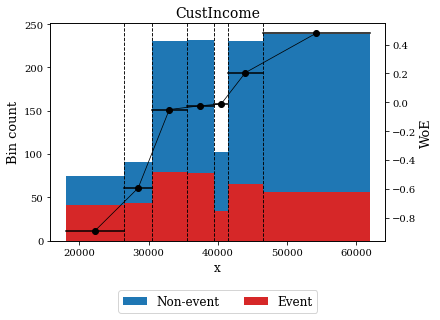

array([  -inf, 26500., 30500., 35500., 39500., 41500., 46500.,    inf])

In [45]:
# Combined plot of bincount and weight of evidence corresponding to each bin with actual boundaries
optb.binning_table.plot(metric = "woe", style = "actual", add_special = False, add_missing = False)
bins = np.append(-np.inf, np.append(optb.splits, +np.inf))
bins

In [46]:
# # As is shown in above cell, the calculated weight of evidence for those bins 
# # betweeen [21.5, 27.5] are close to eachother so it makes a lot of scence to
# # combine them. The new bin boundaries are listed in below.
# user_splits =       [26500., 30500., 41500., 46500.,]
# user_splits_fixed = [False,  False,  False,  False]

In [47]:
# # Rebucketing with new bin boundaries to see if we will see a uniform trend or not
# optb = OptimalBinning(name = 'CustIncome', dtype = "numerical", solver = "cp",
#                       user_splits = user_splits, user_splits_fixed = user_splits_fixed)
# optb.fit(numerical['CustIncome'], numerical['status'])

In [48]:
# # Calculated optimal bins and corresponding weight of evidence after merging some bins
# optb.binning_table.build()

In [49]:
# # The calculated weight of evidence with the new bin boundaries show perfect uniformly increasing trend.
# optb.binning_table.plot(metric = "woe", style = "actual", add_special = False, add_missing = False)
# bins = np.append(-np.inf, np.append(optb.splits, +np.inf))
# bins

In [50]:
x     = optb.binning_table.build()
x     = kategorizer_label(x)
dummy = x[['Var_name', 'WoE']].sort_values(axis = 0, by = 'WoE' )

Scaled_WoE = pd.concat([Scaled_WoE, lin_skaler_numerical(dummy, 0, 10, 'CustIncome')], axis = 0)
Scaled_WoE.sort_values(by = 'Var_name', ).reset_index( drop = True)

,Var_name,WoE,Scaled_WoE
0,CustIncome_A,-0.89163,0.000000
1,CustIncome_B,-0.594418,2.167305
2,CustIncome_C,-0.049986,6.137359
3,CustIncome_D,-0.024175,6.325576
4,CustIncome_E,-0.011271,6.419669
5,CustIncome_F,0.205793,8.002526
6,CustIncome_G,0.479716,10.000000
7,EmpStatus_Employed,-0.2418,0.000000
8,EmpStatus_Unknown,0.199468,10.000000
9,OtherCC_No,0.268316,10.000000


In [51]:
Data  = kategorizer(numerical, 'CustIncome', bins)
Data

,CustAge,TmAtAddress,CustIncome,TmWBank,AMBalance,UtilRate,status
0,E,B,G,55,1055.93,0.22,0
1,E,A,G,25,1161.58,0.24,0
2,E,A,D,61,877.23,0.29,0
3,E,C,G,20,157.37,0.08,0
4,F,B,G,14,561.84,0.11,0
...,...,...,...,...,...,...,...
1195,E,C,E,51,1230.98,0.35,0
1196,E,A,F,4,239.28,0.13,1
1197,D,B,B,47,16.18,0.01,1
1198,E,C,D,48,1009.24,0.47,0


In [52]:
# First bucketing "orig_time" feature 
optb = OptimalBinning(name = 'TmWBank', dtype = "numerical", solver = "cp",)
optb.fit(numerical['TmWBank'], numerical['status'])

OptimalBinning(name='TmWBank')

In [53]:
# Calculated optimal bins and corresponding weigh of evidence and information values
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 14.50)",310,0.258333,197,113,0.364516,-0.148603,0.005841,0.000729
1,"[14.50, 28.50)",295,0.245833,184,111,0.376271,-0.199013,0.010041,0.001253
2,"[28.50, 32.50)",64,0.053333,34,30,0.468750,-0.579255,0.019246,0.002373
3,"[32.50, 44.50)",169,0.140833,115,54,0.319527,0.05153,0.000371,0.000046
4,"[44.50, 75.50)",267,0.222500,192,75,0.280899,0.235589,0.011823,0.001475
5,"[75.50, inf)",95,0.079167,81,14,0.147368,1.050973,0.068951,0.008243
6,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
7,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,1200,1.000000,803,397,0.330833,,0.116274,0.014119


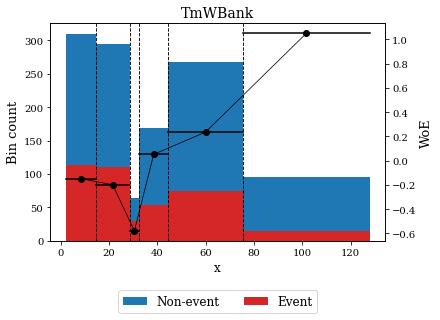

array([-inf, 14.5, 28.5, 32.5, 44.5, 75.5,  inf])

In [54]:
# Combined plot of bincount and weight of evidence corresponding to each bin with actual boundaries
optb.binning_table.plot(metric = "woe", style = "actual", add_special = False, add_missing = False)
bins = np.append(-np.inf, np.append(optb.splits, +np.inf))
bins

In [55]:
# As is shown in above cell, the calculated weight of evidence for those bins 
# betweeen [21.5, 27.5] are close to eachother so it makes a lot of scence to
# combine them. The new bin boundaries are listed in below.
user_splits =       [28.5,  32.5,   44.5,  75.5,]
user_splits_fixed = [False, False,  False, False]

In [56]:
# Rebucketing with new bin boundaries to see if we will see a uniform trend or not
optb = OptimalBinning(name = 'TmWBank', dtype = "numerical", solver = "cp",
                      user_splits = user_splits, user_splits_fixed = user_splits_fixed)
optb.fit(numerical['TmWBank'], numerical['status'])

OptimalBinning(name='TmWBank', user_splits=[28.5, 32.5, 44.5, 75.5],
               user_splits_fixed=array([False, False, False, False]))

In [57]:
# Calculated optimal bins and corresponding weight of evidence after merging some bins
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 32.50)",669,0.557500,415,254,0.379671,-0.213474,0.026254,0.003276
1,"[32.50, 44.50)",169,0.140833,115,54,0.319527,0.05153,0.000371,0.000046
2,"[44.50, 75.50)",267,0.222500,192,75,0.280899,0.235589,0.011823,0.001475
3,"[75.50, inf)",95,0.079167,81,14,0.147368,1.050973,0.068951,0.008243
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,1200,1.000000,803,397,0.330833,,0.107400,0.013039


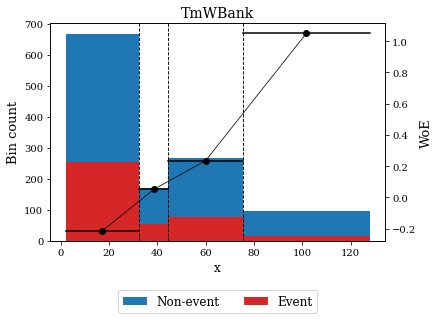

array([-inf, 32.5, 44.5, 75.5,  inf])

In [58]:
# Combined plot of bincount and weight of evidence corresponding to each bin with actual boundaries
optb.binning_table.plot(metric = "woe", style = "actual", add_special = False, add_missing = False)
bins = np.append(-np.inf, np.append(optb.splits, +np.inf))
bins

In [59]:
x     = optb.binning_table.build()
x     = kategorizer_label(x)
dummy = x[['Var_name', 'WoE']].sort_values(axis = 0, by = 'WoE' )

Scaled_WoE = pd.concat([Scaled_WoE, lin_skaler_numerical(dummy, 0, 10, 'TmWBank')], axis = 0)
Scaled_WoE.sort_values(by = 'Var_name', ).reset_index( drop = True)

,Var_name,WoE,Scaled_WoE
0,CustIncome_A,-0.89163,0.000000
1,CustIncome_B,-0.594418,2.167305
2,CustIncome_C,-0.049986,6.137359
3,CustIncome_D,-0.024175,6.325576
4,CustIncome_E,-0.011271,6.419669
5,CustIncome_F,0.205793,8.002526
6,CustIncome_G,0.479716,10.000000
7,EmpStatus_Employed,-0.2418,0.000000
8,EmpStatus_Unknown,0.199468,10.000000
9,OtherCC_No,0.268316,10.000000


In [60]:
Data  = kategorizer(numerical, 'TmWBank', bins)
Data

,CustAge,TmAtAddress,CustIncome,TmWBank,AMBalance,UtilRate,status
0,E,B,G,C,1055.93,0.22,0
1,E,A,G,A,1161.58,0.24,0
2,E,A,D,C,877.23,0.29,0
3,E,C,G,A,157.37,0.08,0
4,F,B,G,A,561.84,0.11,0
...,...,...,...,...,...,...,...
1195,E,C,E,C,1230.98,0.35,0
1196,E,A,F,A,239.28,0.13,1
1197,D,B,B,C,16.18,0.01,1
1198,E,C,D,C,1009.24,0.47,0


In [61]:
# First bucketing "orig_time" feature 
optb = OptimalBinning(name = 'AMBalance', dtype = "numerical", solver = "cp",)
optb.fit(numerical['AMBalance'], numerical['status'])

OptimalBinning(name='AMBalance')

In [62]:
# Calculated optimal bins and corresponding weigh of evidence and information values
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 58.16)",60,0.050000,38,22,0.366667,-0.157875,0.001278,0.000160
1,"[58.16, 252.39)",172,0.143333,122,50,0.290698,0.18758,0.004874,0.000608
2,"[252.39, 417.03)",137,0.114167,98,39,0.284672,0.216987,0.005166,0.000644
3,"[417.03, 499.63)",64,0.053333,56,8,0.125000,1.241492,0.061562,0.007236
4,"[499.63, 587.53)",72,0.060000,54,18,0.250000,0.394194,0.008636,0.001073
5,"[587.53, 1669.65)",595,0.495833,379,216,0.363025,-0.142161,0.010250,0.001280
6,"[1669.65, inf)",100,0.083333,56,44,0.440000,-0.463256,0.019036,0.002359
7,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
8,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,1200,1.000000,803,397,0.330833,,0.110802,0.013360


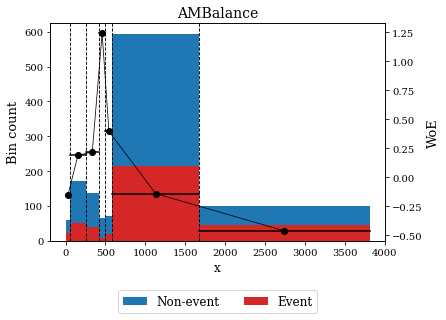

array([         -inf,   58.15999985,  252.39499664,  417.0349884 ,
        499.62998962,  587.52999878, 1669.65496826,           inf])

In [63]:
# Combined plot of bincount and weight of evidence corresponding to each bin with actual boundaries
optb.binning_table.plot(metric = "woe", style = "actual", add_special = False, add_missing = False)
bins = np.append(-np.inf, np.append(optb.splits, +np.inf))
bins

In [64]:
# As is shown in above cell, the calculated weight of evidence for those bins 
# betweeen [21.5, 27.5] are close to eachother so it makes a lot of scence to
# combine them. The new bin boundaries are listed in below.
user_splits =       [499.62998962,  1669.65496826, ]
user_splits_fixed = [False,         False]

In [65]:
# Rebucketing with new bin boundaries to see if we will see a uniform trend or not
optb = OptimalBinning(name = 'AMBalance', dtype = "numerical", solver = "cp",
                      user_splits = user_splits, user_splits_fixed = user_splits_fixed)
optb.fit(numerical['AMBalance'], numerical['status'])

OptimalBinning(name='AMBalance', user_splits=[499.62998962, 1669.65496826],
               user_splits_fixed=array([False, False]))

In [66]:
# Calculated optimal bins and corresponding weight of evidence after merging some bins
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 499.63)",433,0.360833,314,119,0.274827,0.265851,0.024268,0.003025
1,"[499.63, 1669.65)",667,0.555833,433,234,0.350825,-0.089002,0.004467,0.000558
2,"[1669.65, inf)",100,0.083333,56,44,0.440000,-0.463256,0.019036,0.002359
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,1200,1.000000,803,397,0.330833,,0.047772,0.005941


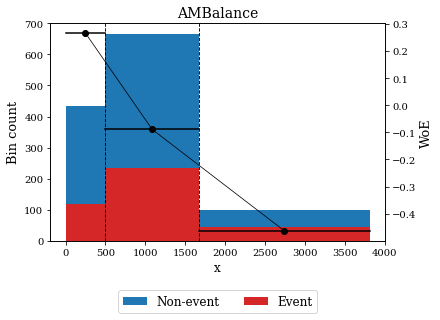

array([         -inf,  499.62998962, 1669.65496826,           inf])

In [67]:
# Combined plot of bincount and weight of evidence corresponding to each bin with actual boundaries
optb.binning_table.plot(metric = "woe", style = "actual", add_special = False, add_missing = False)
bins = np.append(-np.inf, np.append(optb.splits, +np.inf))
bins

In [68]:
x     = optb.binning_table.build()
x     = kategorizer_label(x)
dummy = x[['Var_name', 'WoE']].sort_values(axis = 0, by = 'WoE' )

Scaled_WoE = pd.concat([Scaled_WoE, lin_skaler_numerical(dummy, 0, 10, 'AMBalance')], axis = 0)
Scaled_WoE.sort_values(by = 'Var_name', ).reset_index( drop = True)

,Var_name,WoE,Scaled_WoE
0,AMBalance_A,0.265851,10.000000
1,AMBalance_B,-0.089002,5.133051
2,AMBalance_C,-0.463256,0.000000
3,CustIncome_A,-0.89163,0.000000
4,CustIncome_B,-0.594418,2.167305
5,CustIncome_C,-0.049986,6.137359
6,CustIncome_D,-0.024175,6.325576
7,CustIncome_E,-0.011271,6.419669
8,CustIncome_F,0.205793,8.002526
9,CustIncome_G,0.479716,10.000000


In [69]:
Data  = kategorizer(numerical, 'AMBalance', bins)
Data

,CustAge,TmAtAddress,CustIncome,TmWBank,AMBalance,UtilRate,status
0,E,B,G,C,B,0.22,0
1,E,A,G,A,B,0.24,0
2,E,A,D,C,B,0.29,0
3,E,C,G,A,A,0.08,0
4,F,B,G,A,B,0.11,0
...,...,...,...,...,...,...,...
1195,E,C,E,C,B,0.35,0
1196,E,A,F,A,A,0.13,1
1197,D,B,B,C,A,0.01,1
1198,E,C,D,C,B,0.47,0


In [70]:
# First bucketing "orig_time" feature 
optb = OptimalBinning(name = 'UtilRate', dtype = "numerical", solver = "cp",)
optb.fit(numerical['UtilRate'], numerical['status'])

OptimalBinning(name='UtilRate')

In [71]:
# Calculated optimal bins and corresponding weight of evidence after merging some bins
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.05)",340,0.283333,224,116,0.341176,-0.046363,0.000614,0.000077
1,"[0.05, 0.30)",546,0.455000,374,172,0.315018,0.072343,0.002351,0.000294
2,"[0.30, 0.38)",94,0.078333,73,21,0.223404,0.541519,0.020584,0.002542
3,"[0.38, inf)",220,0.183333,132,88,0.400000,-0.298953,0.017124,0.002133
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,1200,1.000000,803,397,0.330833,,0.040673,0.005045


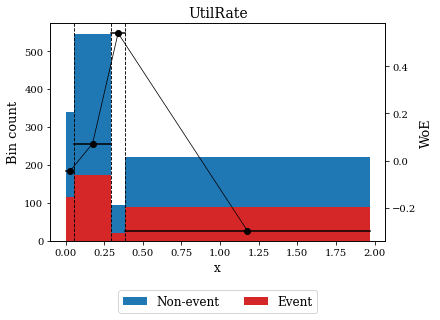

array([      -inf, 0.055     , 0.295     , 0.38499999,        inf])

In [72]:
# Combined plot of bincount and weight of evidence corresponding to each bin with actual boundaries
optb.binning_table.plot(metric = "woe", style = "actual", add_special = False, add_missing = False)
bins = np.append(-np.inf, np.append(optb.splits, +np.inf))
bins

In [73]:
# As is shown in above cell, the calculated weight of evidence for those bins 
# betweeen [21.5, 27.5] are close to eachother so it makes a lot of scence to
# combine them. The new bin boundaries are listed in below.
user_splits =       [0.38499999, ]
user_splits_fixed = [False]

In [74]:
# Rebucketing with new bin boundaries to see if we will see a uniform trend or not
optb = OptimalBinning(name = 'UtilRate', dtype = "numerical", solver = "cp",
                      user_splits = user_splits, user_splits_fixed = user_splits_fixed)
optb.fit(numerical['UtilRate'], numerical['status'])

OptimalBinning(name='UtilRate', user_splits=[0.38499999],
               user_splits_fixed=array([False]))

In [75]:
# Calculated optimal bins and corresponding weight of evidence after merging some bins
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.38)",980,0.816667,671,309,0.315306,0.071009,0.004067,0.000508
1,"[0.38, inf)",220,0.183333,132,88,0.400000,-0.298953,0.017124,0.002133
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,1200,1.000000,803,397,0.330833,,0.021191,0.002641


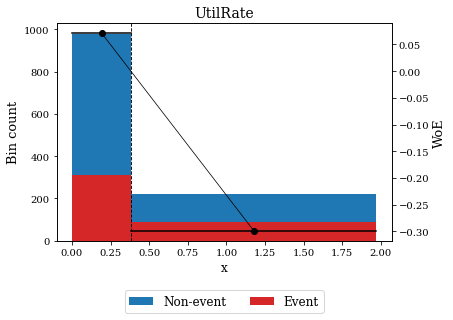

array([      -inf, 0.38499999,        inf])

In [76]:
# Combined plot of bincount and weight of evidence corresponding to each bin with actual boundaries
optb.binning_table.plot(metric = "woe", style = "actual", add_special = False, add_missing = False)
bins = np.append(-np.inf, np.append(optb.splits, +np.inf))
bins

In [77]:
x     = optb.binning_table.build()
x     = kategorizer_label(x)
dummy = x[['Var_name', 'WoE']].sort_values(axis = 0, by = 'WoE' )

Scaled_WoE = pd.concat([Scaled_WoE, lin_skaler_numerical(dummy, 0, 10, 'UtilRate')], axis = 0)
Scaled_WoE.sort_values(by = 'Var_name', ).reset_index( drop = True)

,Var_name,WoE,Scaled_WoE
0,AMBalance_A,0.265851,10.000000
1,AMBalance_B,-0.089002,5.133051
2,AMBalance_C,-0.463256,0.000000
3,CustIncome_A,-0.89163,0.000000
4,CustIncome_B,-0.594418,2.167305
5,CustIncome_C,-0.049986,6.137359
6,CustIncome_D,-0.024175,6.325576
7,CustIncome_E,-0.011271,6.419669
8,CustIncome_F,0.205793,8.002526
9,CustIncome_G,0.479716,10.000000


In [78]:
Data  = kategorizer(numerical, 'UtilRate', bins)
Data

,CustAge,TmAtAddress,CustIncome,TmWBank,AMBalance,UtilRate,status
0,E,B,G,C,B,A,0
1,E,A,G,A,B,A,0
2,E,A,D,C,B,A,0
3,E,C,G,A,A,A,0
4,F,B,G,A,B,A,0
...,...,...,...,...,...,...,...
1195,E,C,E,C,B,A,0
1196,E,A,F,A,A,A,1
1197,D,B,B,C,A,A,1
1198,E,C,D,C,B,B,0


In [79]:
processed_data = pd.concat([categorical, numerical], axis = 1)
processed_data

,ResStatus,EmpStatus,OtherCC,status,CustAge,TmAtAddress,CustIncome,TmWBank,AMBalance,UtilRate,status
0,undefined,Unknown,Yes,0,E,B,G,C,B,A,0
1,Home Owner,Employed,Yes,0,E,A,G,A,B,A,0
2,Tenant,Employed,No,0,E,A,D,C,B,A,0
3,Home Owner,Employed,Yes,0,E,C,G,A,A,A,0
4,Home Owner,Employed,Yes,0,F,B,G,A,B,A,0
...,...,...,...,...,...,...,...,...,...,...,...
1195,Home Owner,Unknown,Yes,0,E,C,E,C,B,A,0
1196,Tenant,Unknown,Yes,1,E,A,F,A,A,A,1
1197,Home Owner,Employed,Yes,1,D,B,B,C,A,A,1
1198,Tenant,Employed,Yes,0,E,C,D,C,B,B,0


In [80]:
# List of final selected features to be incorporated into final model
features_list = ['ResStatus', 'EmpStatus', 'OtherCC',  'CustAge', 'TmAtAddress',
                 'CustIncome','TmWBank',   'AMBalance','UtilRate',]

df_cox = Data[['status',]]

for col in features_list:
    dummies = pd.get_dummies(processed_data[[col]], drop_first = False)
    df_cox  = pd.concat([df_cox, dummies], axis = 1)

df_cox.head()

,status,ResStatus_Home Owner,ResStatus_Other,ResStatus_Tenant,ResStatus_undefined,EmpStatus_Employed,EmpStatus_Unknown,OtherCC_No,OtherCC_Yes,CustAge_A,CustAge_B,CustAge_C,CustAge_D,CustAge_E,CustAge_F,TmAtAddress_A,TmAtAddress_B,TmAtAddress_C,CustIncome_A,CustIncome_B,CustIncome_C,CustIncome_D,CustIncome_E,CustIncome_F,CustIncome_G,TmWBank_A,TmWBank_B,TmWBank_C,TmWBank_D,AMBalance_A,AMBalance_B,AMBalance_C,UtilRate_A,UtilRate_B
0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0
1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0
2,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0
3,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0
4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0


In [81]:
df_cox.columns

Index(['status', 'ResStatus_Home Owner', 'ResStatus_Other', 'ResStatus_Tenant',
       'ResStatus_undefined', 'EmpStatus_Employed', 'EmpStatus_Unknown',
       'OtherCC_No', 'OtherCC_Yes', 'CustAge_A', 'CustAge_B', 'CustAge_C',
       'CustAge_D', 'CustAge_E', 'CustAge_F', 'TmAtAddress_A', 'TmAtAddress_B',
       'TmAtAddress_C', 'CustIncome_A', 'CustIncome_B', 'CustIncome_C',
       'CustIncome_D', 'CustIncome_E', 'CustIncome_F', 'CustIncome_G',
       'TmWBank_A', 'TmWBank_B', 'TmWBank_C', 'TmWBank_D', 'AMBalance_A',
       'AMBalance_B', 'AMBalance_C', 'UtilRate_A', 'UtilRate_B'],
      dtype='object')

<AxesSubplot:>

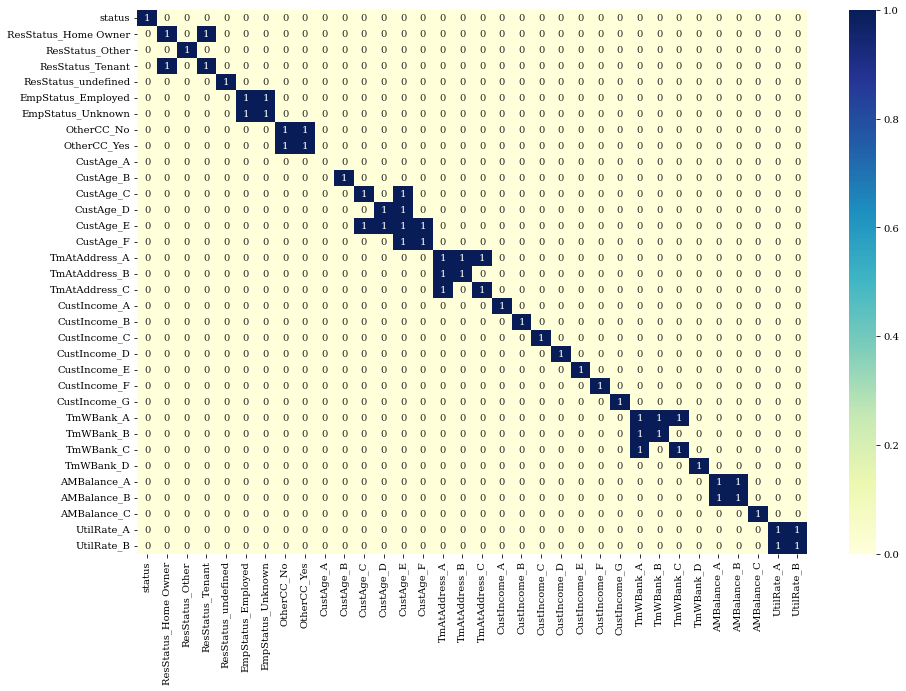

In [82]:
fig , ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = ((15,10)))
sns.heatmap(df_cox.corr().abs() > 0.4 ,cmap = "YlGnBu", annot = True,)

## Multifactor analysis

In [83]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                           initial_list=[], 
                           threshold_in=0.01, 
                           threshold_out = 0.05, 
                           verbose=True):
        """ Perform a forward-backward feature selection 
        based on p-value from statsmodels.api.OLS
        Arguments:
            X - pandas.DataFrame with candidate features
            y - list-like with the target
            initial_list - list of features to start with (column names of X)
            threshold_in - include a feature if its p-value < threshold_in
            threshold_out - exclude a feature if its p-value > threshold_out
            verbose - whether to print the sequence of inclusions and exclusions
        Returns: list of selected features 
        Always set threshold_in < threshold_out to avoid infinite looping.
        See https://en.wikipedia.org/wiki/Stepwise_regression for the details
        """
        included = list(initial_list)
        while True:
            changed=False
            # forward step
            excluded = list(set(X.columns)-set(included))
            new_pval = pd.Series(index=excluded)
            for new_column in excluded:
                model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
                new_pval[new_column] = model.pvalues[new_column]
            best_pval = new_pval.min()
            if best_pval < threshold_in:
                best_feature = new_pval.idxmin()
                included.append(best_feature)
                changed=True
                if verbose:
                    print('Add  {:30} with p-value {:.6f}'.format(best_feature, best_pval))

            # backward step
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
            # use all coefs except intercept
            pvalues = model.pvalues.iloc[1:]
            worst_pval = pvalues.max() # null if pvalues is empty
            if worst_pval > threshold_out:
                changed=True
                worst_feature = pvalues.idxmax()
                included.remove(worst_feature)
                if verbose:
                    print('Drop {:30} with p-value {:.6f}'.format(worst_feature, worst_pval))
            if not changed:
                break
        return included

In [84]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset


selected_features = df_cox.columns.tolist()
selected_features.remove('status')

X = df_cox[selected_features]
Y = df_cox.iloc[:,0]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

print(X_train.shape,Y_train.shape)
print(X_test.shape,  Y_test.shape)
X_train

(960, 33) (960,)
(240, 33) (240,)


,ResStatus_Home Owner,ResStatus_Other,ResStatus_Tenant,ResStatus_undefined,EmpStatus_Employed,EmpStatus_Unknown,OtherCC_No,OtherCC_Yes,CustAge_A,CustAge_B,CustAge_C,CustAge_D,CustAge_E,CustAge_F,TmAtAddress_A,TmAtAddress_B,TmAtAddress_C,CustIncome_A,CustIncome_B,CustIncome_C,CustIncome_D,CustIncome_E,CustIncome_F,CustIncome_G,TmWBank_A,TmWBank_B,TmWBank_C,TmWBank_D,AMBalance_A,AMBalance_B,AMBalance_C,UtilRate_A,UtilRate_B
728,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0
271,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
850,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0
763,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0
373,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
733,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
852,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
1063,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0


In [85]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [86]:
#reg = LogisticRegression()

# reg = LogisticRegression_with_p_values()
# # pd.options.display.max_rows = None

# reg.fit(X_train, Y_train)

# feature_name = X_train.columns.values

In [87]:
result = stepwise_selection(X_train, Y_train,initial_list=[], 
                           threshold_in  = 0.2, 
                           threshold_out = 0.9, 
                           verbose=True)

print('resulting features:')
print(result)

Add  TmWBank_A                      with p-value 0.000096
Add  EmpStatus_Unknown              with p-value 0.000365
Add  AMBalance_A                    with p-value 0.001232
Add  CustIncome_G                   with p-value 0.002803
Add  EmpStatus_Employed             with p-value 0.000876
Add  CustIncome_B                   with p-value 0.010822
Add  CustIncome_A                   with p-value 0.009632
Add  CustAge_F                      with p-value 0.025718
Add  TmWBank_B                      with p-value 0.037456
Drop EmpStatus_Employed             with p-value 0.924810
Add  CustIncome_C                   with p-value 0.041567
Add  OtherCC_No                     with p-value 0.067239
Add  OtherCC_Yes                    with p-value 0.053351
Add  ResStatus_Other                with p-value 0.170631
Add  TmWBank_D                      with p-value 0.164856
resulting features:
['TmWBank_A', 'EmpStatus_Unknown', 'AMBalance_A', 'CustIncome_G', 'CustIncome_B', 'CustIncome_A', 'CustAge_F',

In [88]:
# df_cox.columns

In [89]:
selected_features = [#'CustAge_A', 'CustAge_B', 'CustAge_C', 'CustAge_D', 'CustAge_E', 'CustAge_F', \
                     'TmWBank_A', 'TmWBank_B', 'TmWBank_C', 'TmWBank_D',\
                     'EmpStatus_Employed', 'EmpStatus_Unknown',\
                     'CustIncome_A', 'CustIncome_B', 'CustIncome_C', 'CustIncome_D','CustIncome_E','CustIncome_F', 'CustIncome_G', \
                     'AMBalance_A', 'AMBalance_B', 'AMBalance_C',\
                     #'OtherCC_Yes','OtherCC_Yes',\
                     ]

print(selected_features)

['TmWBank_A', 'TmWBank_B', 'TmWBank_C', 'TmWBank_D', 'EmpStatus_Employed', 'EmpStatus_Unknown', 'CustIncome_A', 'CustIncome_B', 'CustIncome_C', 'CustIncome_D', 'CustIncome_E', 'CustIncome_F', 'CustIncome_G', 'AMBalance_A', 'AMBalance_B', 'AMBalance_C']


<AxesSubplot:>

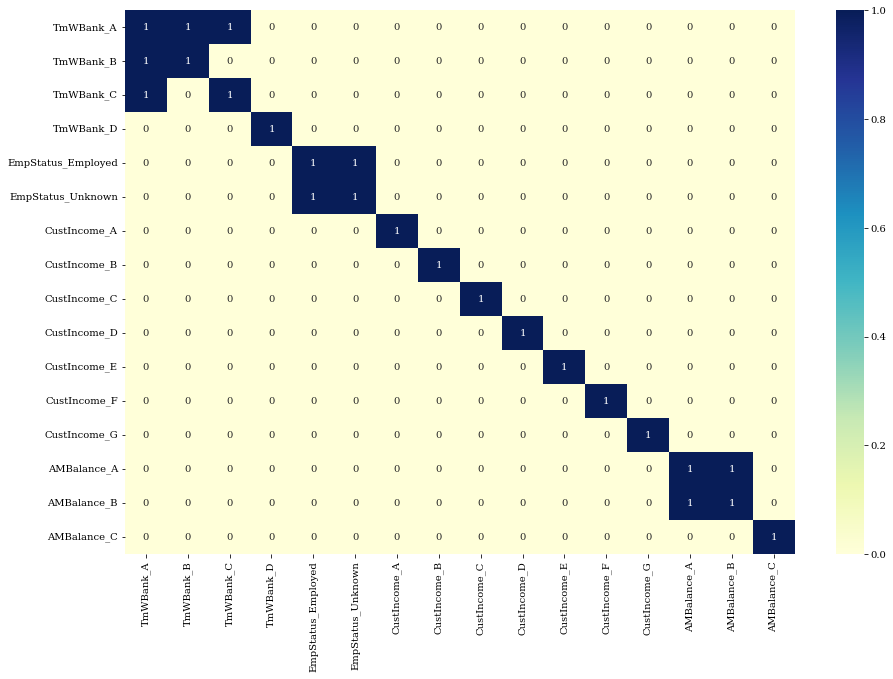

In [90]:
fig , ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = ((15,10)))
sns.heatmap(df_cox[selected_features].corr().abs() > 0.4 ,cmap = "YlGnBu", annot = True,)

In [91]:
X = df_cox[selected_features]
Y = df_cox.iloc[:,0]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101 )

print(X_train.shape,Y_train.shape)
print(X_test.shape,  Y_test.shape)
X_train.head()

(840, 16) (840,)
(360, 16) (360,)


,TmWBank_A,TmWBank_B,TmWBank_C,TmWBank_D,EmpStatus_Employed,EmpStatus_Unknown,CustIncome_A,CustIncome_B,CustIncome_C,CustIncome_D,CustIncome_E,CustIncome_F,CustIncome_G,AMBalance_A,AMBalance_B,AMBalance_C
346,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
106,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
479,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0
9,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
180,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0


In [92]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [93]:
model = LogisticRegression()
#reg = LogisticRegression_with_p_values()

model.fit(X_train, Y_train)

feature_name = X_train.columns.values

In [94]:
summary_table = pd.DataFrame(columns = ['Var_name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(model.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', model.intercept_[0]]
summary_table = summary_table.sort_index()

#p_values = reg.p_values
#p_values = np.append(np.nan, np.array(p_values))
#summary_table['p_values'] = p_values
#summary_table.sort_values(by = 'Var_name')

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.632


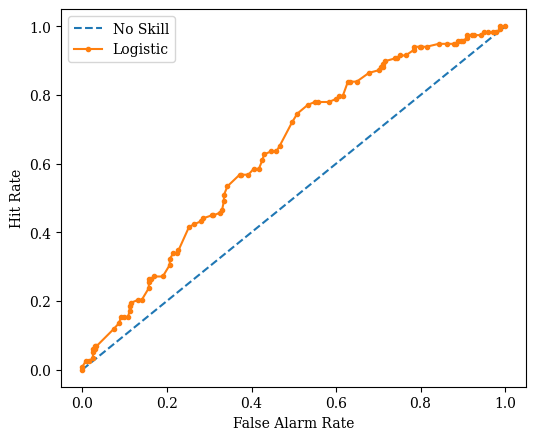

In [95]:
f, (ax_hist) = plt.subplots(figsize = (6, 5), dpi = 100)

# split into train/test sets
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Y_test))]
# # fit a model
result = model.fit(X_train, Y_train)

# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Alarm Rate')
pyplot.ylabel('Hit Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [96]:
Scaled_WoE = pd.merge(Scaled_WoE, summary_table , on = 'Var_name')

intercept = pd.DataFrame([['Intercept', 1, 1, model.intercept_[0], 0]], \
                         columns = ['Var_name','WoE','Scaled_WoE','Coefficients','p_values'])

Scaled_WoE = pd.concat([intercept,Scaled_WoE], axis = 0).drop(['p_values', ], axis = 1).reset_index(drop = True)
Scaled_WoE

,Var_name,WoE,Scaled_WoE,Coefficients
0,Intercept,1,1.000000,-0.768470
1,EmpStatus_Employed,-0.2418,0.000000,-0.110724
2,EmpStatus_Unknown,0.199468,10.000000,0.110669
3,CustIncome_A,-0.89163,0.000000,0.594345
4,CustIncome_B,-0.594418,2.167305,0.379060
5,CustIncome_C,-0.049986,6.137359,0.227170
6,CustIncome_D,-0.024175,6.325576,-0.232759
7,CustIncome_E,-0.011271,6.419669,-0.029906
8,CustIncome_F,0.205793,8.002526,-0.302788
9,CustIncome_G,0.479716,10.000000,-0.635176


In [97]:
m, n = df_cox[selected_features].shape
print(m,n)
x = df_cox[selected_features]
ones = np.ones((m,), dtype=int)


x.insert(0, "Intercept", ones, True)
m, n = x.shape
print(m,n)
x.head()

1200 16
1200 17


,Intercept,TmWBank_A,TmWBank_B,TmWBank_C,TmWBank_D,EmpStatus_Employed,EmpStatus_Unknown,CustIncome_A,CustIncome_B,CustIncome_C,CustIncome_D,CustIncome_E,CustIncome_F,CustIncome_G,AMBalance_A,AMBalance_B,AMBalance_C
0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0
1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
2,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0
3,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
4,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [98]:
#x['score'] = x.apply(lambda x: (Scaled_WoE['Scaled_WoE']*Scaled_WoE['Coefficients']*(np.array(x))).sum())

x['score'] = x.apply(lambda x: \
                     np.sum(np.array(x)*Scaled_WoE['Scaled_WoE']*Scaled_WoE['Coefficients']),  axis=1)
x.head()

,Intercept,TmWBank_A,TmWBank_B,TmWBank_C,TmWBank_D,EmpStatus_Employed,EmpStatus_Unknown,CustIncome_A,CustIncome_B,CustIncome_C,CustIncome_D,CustIncome_E,CustIncome_F,CustIncome_G,AMBalance_A,AMBalance_B,AMBalance_C,score
0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,-9.519338
1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,-6.652780
2,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0.329310
3,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,-6.356337
4,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,-6.652780


In [99]:
def lin_skaler_numerical_1(data, c, d):
    a               =  np.min(data['score'])
    b               =  np.max(data['score'])
    data['Score'] = data['score'].apply(lambda x: c + ((d-c)/(b-a))*(x - a))
    return data    

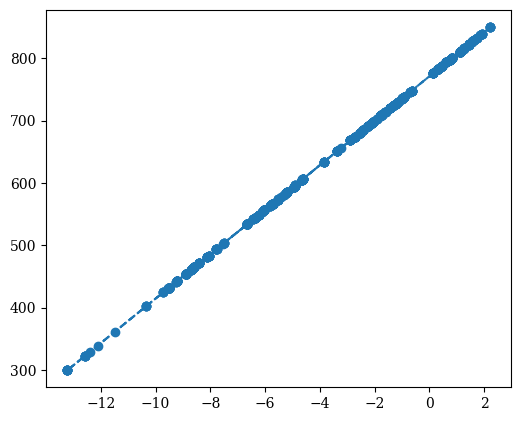

In [100]:
f, (ax_hist) = plt.subplots(figsize = (6, 5), dpi = 100)


xx = lin_skaler_numerical_1(x, 300, 850)
xx['pd'] =  model.predict_proba(X)[:,1]

plt.plot(xx['score'], xx['Score'], '--o')
plt.show()
xx = xx.drop('score', axis = 1)

In [122]:
data['pd']    = xx['pd']
data['Score'] = xx['Score']
data = data.sort_values(by = [ 'Score',])

data['Odd'] = data['pd'].apply(lambda x: x/(1-x))
display(pd.concat([data.head(), data.tail()], axis = 0))

,CustAge,TmAtAddress,ResStatus,EmpStatus,CustIncome,TmWBank,OtherCC,AMBalance,UtilRate,status,pd,Score,Log_odd,Odd
740,NaN,13,Other,Unknown,47000,20,Yes,1906.49,0.64,1,0.416131,300.0,1.403091,0.712712
817,57.0,34,Home Owner,Unknown,51000,65,Yes,1806.30,0.34,1,0.332661,300.0,2.006061,0.498489
421,72.0,12,Tenant,Unknown,61000,10,No,2101.37,1.29,0,0.416131,300.0,1.403091,0.712712
927,38.0,42,Home Owner,Unknown,56000,11,No,2360.09,1.24,0,0.416131,300.0,1.403091,0.712712
168,55.0,32,<undefined>,Unknown,47000,12,Yes,2471.57,0.36,1,0.416131,300.0,1.403091,0.712712
886,57.0,32,Tenant,Employed,42000,43,No,409.75,0.18,1,0.179522,850.0,4.570356,0.218801
1183,55.0,57,Tenant,Employed,46000,41,Yes,285.39,0.00,0,0.179522,850.0,4.570356,0.218801
472,46.0,101,Home Owner,Employed,43000,38,Yes,367.00,0.04,1,0.179522,850.0,4.570356,0.218801
883,49.0,38,Tenant,Employed,45000,35,Yes,249.67,0.03,0,0.179522,850.0,4.570356,0.218801
716,47.0,34,Other,Employed,45000,35,Yes,320.23,0.06,0,0.179522,850.0,4.570356,0.218801


# Calibration

# Summary